# Chronic Kidney Disease Dataset




This dataset contains detailed health information for 1,659 patients diagnosed with Chronic Kidney Disease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors. Each patient is uniquely identified by a Patient ID, and the data includes a confidential column indicating the doctor in charge.





## 1- Load from Kaggle

In [2]:
import os
import zipfile
import pandas as pd

# Download the Chronic Kidney Disease dataset
!kaggle datasets download -d rabieelkharoua/chronic-kidney-disease-dataset-analysis

# Unzip the dataset
with zipfile.ZipFile('chronic-kidney-disease-dataset-analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('chronic_kidney_disease')



Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis
License(s): Attribution 4.0 International (CC BY 4.0)
chronic-kidney-disease-dataset-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
df = pd.read_csv('chronic_kidney_disease/Chronic_Kidney_Dsease_data.csv')
print(df.head()) 
df = df.drop([df.columns[0], df.columns[-1]], axis=1)
display(df)

   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChem

Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel        BMI  \
0      71       0          0                    0               2  31.069414   
1      34       0          0                    1               3  29.692119   
2      80       1          1                    0               1  37.394822   
3      40       0          2                    0               1  31.329680   
4      43       0          1                    1               2  23.726311   
...   ...     ...        ...                  ...             ...        ...   
1654   90       0          0                    1               2  39.677059   
1655   34       0          0                    2               1  28.922015   
1656   84       0          0                    2               3  21.951219   
1657   90       0          0                    2               2  24.964149   
1658   34       1          1                    0               0  19.253258   

      Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0           1            5.128112          1.676220     0.240386  ...   
1           1           18.609552          8.377574     6.503233  ...   
2           1           11.882429          9.607401     2.104828  ...   
3           0           16.020165          0.408871     6.964422  ...   
4           0            7.944146          0.780319     3.097796  ...   
...       ...                 ...               ...          ...  ...   
1654        1            1.370151          4.157954     8.602873  ...   
1655        0            3.372073          9.647525     9.836919  ...   
1656        0           15.825955          7.349964     5.038194  ...   
1657        0           12.967462          0.618614     4.557577  ...   
1658        1           11.396510          7.446314     0.757396  ...   

      MuscleCramps   Itching  QualityOfLifeScore  HeavyMetalsExposure  \
0         4.518513  7.556302           76.076800                    0   
1         2.202222  6.836766           40.128498                    0   
2         5.967271  2.144722           92.872842                    0   
3         2.176387  7.077188           90.080321                    0   
4         6.800993  3.553118            5.258372                    0   
...            ...       ...                 ...                  ...   
1654      6.972093  2.138976           81.102765                    0   
1655      0.465297  7.911566           10.600428                    0   
1656      2.281970  0.015531           69.633427                    0   
1657      0.257814  3.432765           31.858023                    0   
1658      5.876286  9.293499           82.314878                    0   

      OccupationalExposureChemicals  WaterQuality  MedicalCheckupsFrequency  \
0                                 0             1                  1.018824   
1                                 0             0                  3.923538   
2                                 1             1                  1.429906   
3                                 0             0                  3.226416   
4                                 0             1                  0.285466   
...                             ...           ...                       ...   
1654                              0             0                  0.951836   
1655                              1             0                  3.604147   
1656                              0             0                  0.801955   
1657                              0             0                  0.560298   
1658                              0             0                  1.754852   

      MedicationAdherence  HealthLiteracy  Diagnosis  
0                4.966808        9.871449          1  
1                8.189275        7.161765          1  
2                7.624028        7.354632          1  
3                3.282688        6.629587          1  
4                3.849498        1.437385          1  
...         

## 2- QI on Data

In [6]:
import sys
print(sys.path)
sys.path.append('code')

from importlib import reload  
import pandas as pd

import clintraj_qi

from clintraj_qi import quantify_nans
from clintraj_qi import detect_variable_type
from clintraj_qi import quantify_dataframe_univariate
from clintraj_qi import SVDcomplete_imputation_method
from clintraj_qi import load_quantification_info
from clintraj_qi import invert_quant_info
from clintraj_qi import dequantify_table


['/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa']


In [7]:
file = 'chronic_kidney_disease/Chronic_Kidney_Dsease_data.csv'


quantify_nans(df,file_to_write=file[:-4]+'_complete.txt')

Missing values 0 (0.0%)
Number of complete rows: 1659 (100.0%)


In [10]:
variable_types, binary, continuous, ordinal = detect_variable_type(df,10,verbose=False)

    
df[binary].to_csv(file[:-4]+'_binary.txt', index=False,sep='\t')
df[continuous].to_csv(file[:-4]+'_continuous.txt', index=False,sep='\t')
df[ordinal].to_csv(file[:-4]+'_ordinal.txt', index=False,sep='\t')

In [12]:
import igraph
import elpigraph # install elpigraph from 
import numpy as np
import os
from os import path

import seaborn as sns

from importlib import reload  
import clintraj_eltree
import clintraj_util
import clintraj_ml
import clintraj_optiscale

reload(clintraj_eltree)
reload(clintraj_util)
reload(clintraj_ml)
reload(clintraj_optiscale)

from clintraj_eltree import visualize_eltree_with_data,pseudo_time_trajectory,extract_trajectories,quantify_pseudotime
from clintraj_eltree import project_on_tree,visualize_eltree_with_data,partition_data_by_tree_branches,prune_the_tree
from clintraj_eltree import ExtendLeaves_modified,regression_of_variable_with_trajectories, draw_pseudotime_dependence
from clintraj_util import associate_with_categorical_var, get_matrix_of_association_scores, get_standard_color_seq, remove_constant_columns_from_dataframe
from clintraj_util import brokenstick_distribution
from clintraj_qi import detect_variable_type
from clintraj_optiscale import optimal_scaling

from clintraj_ml import apply_panel_of_manifold_learning_methods

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [14]:

for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('float64')

# Proceed with your operation as usual
dfq, replacement_info = quantify_dataframe_univariate(df, variable_types)
display(dfq)
print(replacement_info)

Age    Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0     71.0 -0.340319  -0.565022            -0.864951        0.348187   
1     34.0 -0.340319  -0.565022             0.172288        0.940369   
2     80.0  0.320019   0.480357            -0.864951       -0.567541   
3     40.0 -0.340319   1.014066            -0.864951       -0.567541   
4     43.0 -0.340319   0.480357             0.172288        0.348187   
...    ...       ...        ...                  ...             ...   
1654  90.0 -0.340319  -0.565022             0.172288        0.348187   
1655  34.0 -0.340319  -0.565022             0.696150       -0.567541   
1656  84.0 -0.340319  -0.565022             0.696150        0.940369   
1657  90.0 -0.340319  -0.565022             0.696150        0.348187   
1658  34.0  0.320019   0.480357            -0.864951       -1.507952   

           BMI   Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
0     0.473393  0.650921           -0.835206         -1.168429    -1.671310   
1     0.284372  0.650921            1.490368          1.170279     0.514741   
2     1.341496  0.650921            0.329927          1.599476    -1.020525   
3     0.509112 -0.269691            1.043694         -1.610721     0.675720   
4    -0.534379 -0.269691           -0.349434         -1.481089    -0.673929   
...        ...       ...                 ...               ...          ...   
1654  1.654711  0.650921           -1.483461         -0.302328     1.247622   
1655  0.178683 -0.269691           -1.138126          1.613479     1.678367   
1656 -0.777994 -0.269691            1.010192          0.811653     0.003368   
1657 -0.364497 -0.269691            0.517097         -1.537523    -0.164392   
1658 -1.148263  0.650921            0.246105          0.845278    -1.490847   

      ...  MuscleCramps   Itching  QualityOfLifeScore  HeavyMetalsExposure  \
0     ...      0.490246  0.868676            0.947049            -0.077497   
1     ...     -0.653308  0.618802           -0.345163            -0.077497   
2     ...      1.205499 -1.010611            1.550806            -0.077497   
3     ...     -0.666063  0.702294            1.450425            -0.077497   
4     ...      1.617107 -0.521515           -1.598618            -0.077497   
...   ...           ...       ...                 ...                  ...   
1654  ...      1.701580 -1.012606            1.127714            -0.077497   
1655  ...     -1.510828  0.992049           -1.406591            -0.077497   
1656  ...     -0.613936 -1.750018            0.715433            -0.077497   
1657  ...     -1.613263 -0.563310           -0.642457            -0.077497   
1658  ...      1.160579  1.471955            1.171285            -0.077497   

      OccupationalExposureChemicals  WaterQuality  MedicalCheckupsFrequency  \
0                         -0.143662      0.884472                 -0.860001   
1                         -0.143662     -0.217134                  1.685111   
2                          1.250111      0.884472                 -0.499811   
3                         -0.143662     -0.217134                  1.074293   
4                         -0.143662      0.884472                 -1.502570   
...                             ...           ...                       ...   
1654                      -0.143662     -0.217134                 -0.918696   
1655                       1.250111     -0.217134                  1.405260   
1656                      -0.143662     -0.217134                 -1.050021   
1657                      -0.143662     -0.217134                 -1.261762   
1658                      -0.143662     -0.217134                 -0.215093   

      MedicationAdherence  HealthLiteracy  Diagnosis  
0                0.006629        1.629671   0.028227  
1                1.129795        0.695382   0.028227  
2                0.932782        0.761882   0.028227  
3               -0.580357        0.511889   0.028227  
4               -0.382800       

Gender	BINARY	{0: -0.3403189589347915, 1: 0.3200192315597338}
Ethnicity	ORDINAL	{0: -0.5650220439307992, 1: 0.48035657347924077, 2: 1.0140659590472723, 3: 1.273083640556284}
SocioeconomicStatus	ORDINAL	{0: -0.8649509254496257, 1: 0.17228760023778067, 2: 0.6961499779084981}
EducationLevel	ORDINAL	{0: -1.5079522854141438, 1: -0.5675407773409361, 2: 0.3481870935101741, 3: 0.9403685982882143}
BMI	CONTINUOUS	{'mean':27.620048776777317,'std':7.286473241915494}
Smoking	BINARY	{0: -0.2696909824972498, 1: 0.6509208281260783}
AlcoholConsumption	CONTINUOUS	{'mean':9.969831179471141,'std':5.797038650740675}
PhysicalActivity	CONTINUOUS	{'mean':5.024246790348405,'std':2.865409933978002}
DietQuality	CONTINUOUS	{'mean':5.02854440376087,'std':2.8649129947505307}
SleepQuality	CONTINUOUS	{'mean':6.9423241578976125,'std':1.703645601421519}
FamilyHistoryKidneyDisease	BINARY	{0: -0.17678051428723762, 1: 1.0765480036722805}
FamilyHistoryHypertension	BINARY	{0: -0.27354126205691864, 1: 0.6340686454479374}
Fam

In [16]:
dfq.round(3).to_csv(file[:-4] + '_q_SVDcomplete.txt', index=False, sep='\t')

In [18]:
# Create a color sequence based on the Diagnosis column
color_sequence = df['Diagnosis'].apply(lambda x: 1 if x == 0 else 2)

# Save the color sequence to a file
with open('color_sequence.txt', 'w') as f:
    for color in color_sequence:
        f.write(f"{color}\n")

In [20]:
# Loading required libraries
import pandas as pd
import numpy as np

# Loading data and initializing settings
dataset_name = 'CKD_analysis'
file = 'chronic_kidney_disease/Chronic_Kidney_Dsease_data_q_SVDcomplete.txt'
color_file = 'chronic_kidney_disease/color_sequence.txt'

# Reading the main dataset
df = pd.read_csv(file, delimiter='\t')

# Removing constant columns from dataframe (if any)
df = remove_constant_columns_from_dataframe(df)

# Detect variable types (binary, continuous, ordinal)
variable_names = [str(s) for s in df.columns[1:]]
variable_types, binary, continuous, ordinal = detect_variable_type(df, 10, verbose=False)

# Converting data to numpy format
X = df[df.columns[1:]].to_numpy()
X_original = X.copy()

# Loading the color sequence file for class labeling
with open(color_file) as fid:
    lines = fid.readlines()
color = np.ones(len(lines), 'int32')
for i, line in enumerate(lines):
    color[i] = int(line.strip('\n'))

# Dictionary to store visualization results
viz_results = {}

print("Data and color sequence successfully loaded!")


Removing  0 columns
Data and color sequence successfully loaded!


In [22]:
# Check the statistics of your data
print(df.describe())

# If you want to check the range of values for each column
print(df.max() - df.min())

               Age       Gender    Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000          1659.000000   
mean     54.441230     0.000145    -0.000077            -0.000173   
std      20.549757     0.329943     0.708711             0.621917   
min      20.000000    -0.340000    -0.565000            -0.865000   
25%      36.000000    -0.340000    -0.565000            -0.865000   
50%      54.000000     0.320000    -0.565000             0.172000   
75%      72.000000     0.320000     0.480000             0.696000   
max      90.000000     0.320000     1.273000             0.696000   

       EducationLevel           BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1.659000e+03  1659.000000         1659.000000   
mean        -0.000287 -2.141479e-18    -0.000195           -0.000007   
std          0.751982  1.000293e+00     0.419287            1.000296   
min         -1.508000 -1.727000e+00    -0.270000           -1.716000   
25%         -0.568

In [24]:
# Pre-processing the data
X = X[:,np.where(np.std(X,axis=0)>0)[0]]
print('Shape of the data matrix:',X.shape)

Shape of the data matrix: (1659, 51)



 Initial Q2: 0.8443875733832087
Initial quantification table:
[array([-0.565,  0.48 ,  1.014,  1.273]), array([-0.865,  0.172,  0.696]), array([-1.508, -0.568,  0.348,  0.94 ])]
Monotonicity: (True, 0.2589999999999999)
Iteration 0 Q2= 0.8443875733832087
Iteration 1 Q2= 0.8443875733832051
Iteration 2 Q2= 0.8449090965841322
Iteration 3 Q2= 0.8449362038779213
Iteration 4 Q2= 0.8449382022788683
Iteration 5 Q2= 0.8449383594286317

 Q2 after update: 0.8449383728446733
Final quantification table:
[array([-0.78138193,  0.55658074,  1.68696221,  1.68696234]), array([-1.45676909,  0.47325012,  0.92254063]), array([-2.0053098 , -0.70154014,  0.37437269,  1.3523084 ])]
Monotonicity: (True, 1.3211039506799693e-07)


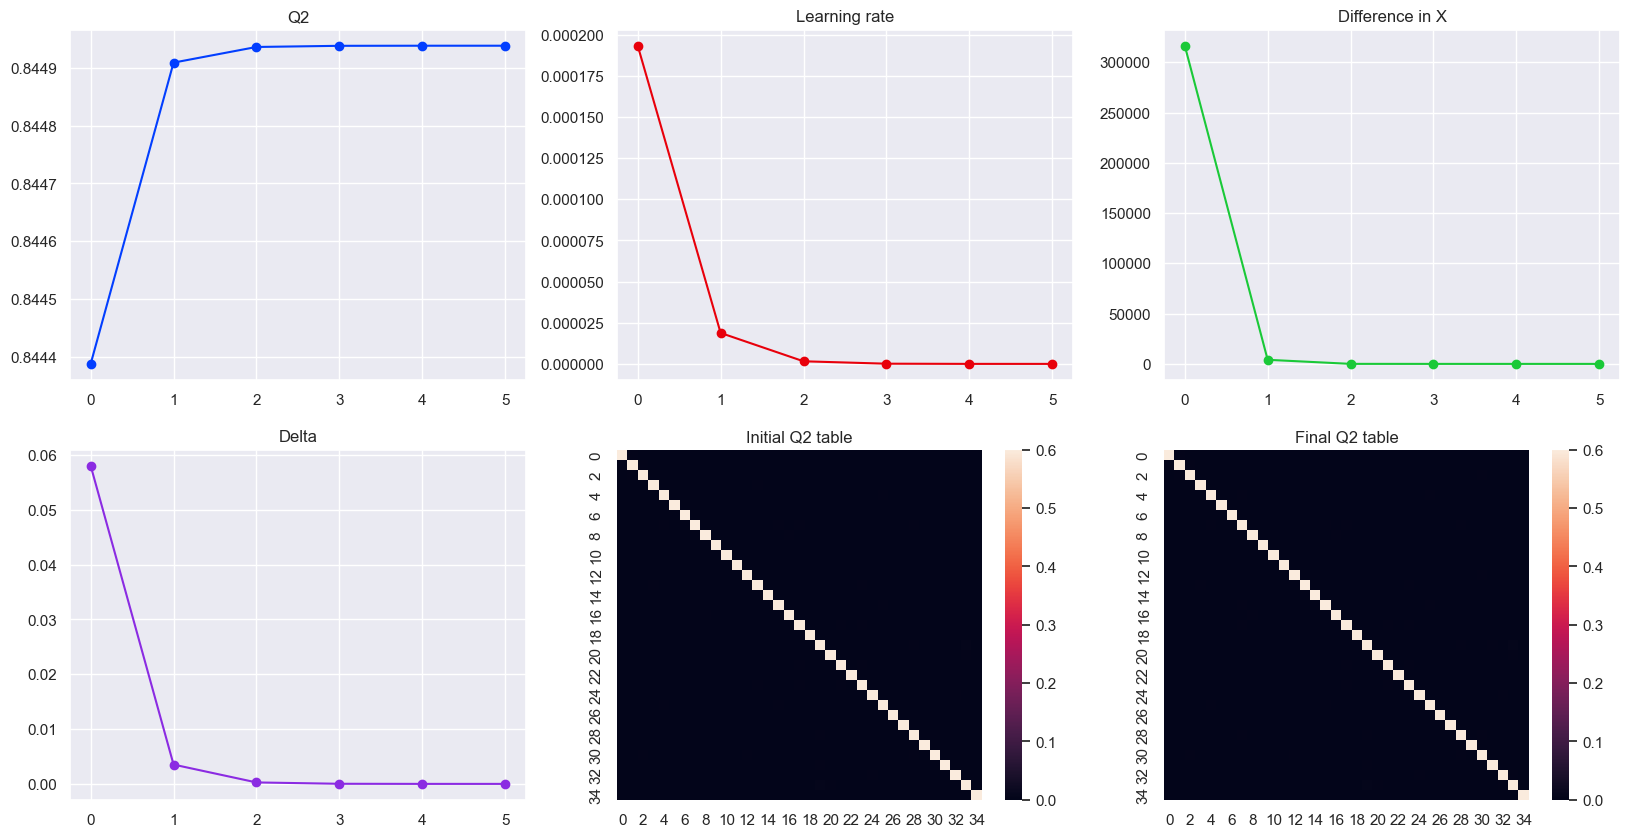

In [26]:
# Apply optimal scaling
X_before_scaling = X.copy()
X,cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)

FVE PC1 0.02876726973990033 FVE PC2 0.025802133794322127
FVE PC1 0.05086687744864437 FVE PC2 0.04562386314363722
[0.05086688 0.09649074 0.14116961 0.18565068 0.2286417  0.27159788
 0.3143456  0.35638474 0.3977181  0.43827639 0.47851349 0.51821733
 0.55741644 0.59626107 0.63494878 0.67350134 0.71158304 0.74895975
 0.78609868 0.82274057 0.85893098 0.89475127 0.93036771 0.96540976
 1.        ]


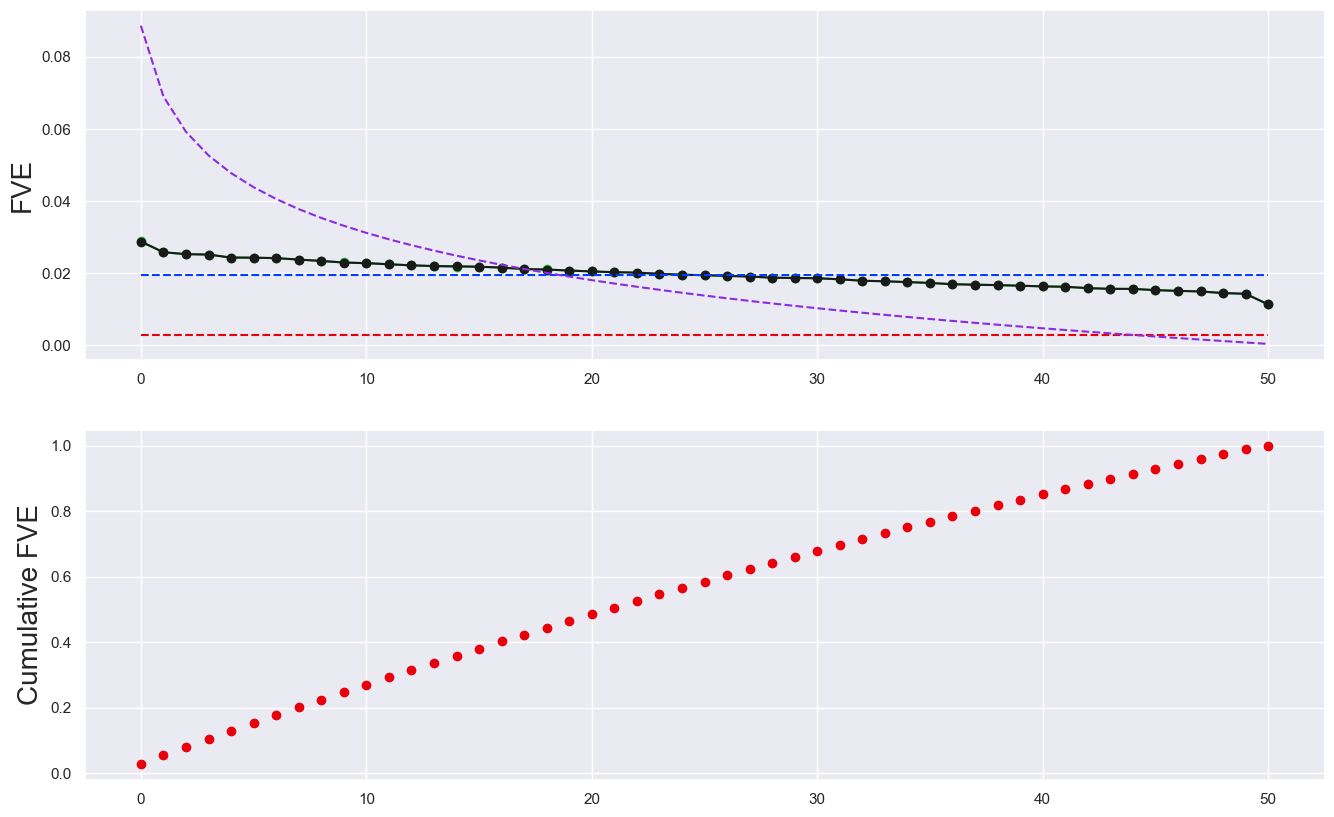

In [28]:
# reducing dimension via PCA
initial_dimension = 25

X = scipy.stats.zscore(X)

pca = PCA(n_components=X.shape[1],svd_solver='full')
Y = pca.fit_transform(X)
s = pca.explained_variance_ratio_
print('FVE PC1',s[0]/np.sum(s),'FVE PC2',s[1]/np.sum(s))
v = pca.components_.T
mean_val = np.mean(X,axis=0)

if 'X_before_scaling' in locals():
    X_before_scaling = scipy.stats.zscore(X_before_scaling)
    Ybs = pca.fit_transform(X_before_scaling)
    sbs = pca.explained_variance_ratio_
    vbs = pca.components_.T
    
fig = plt.figure(figsize=(16,10))
plt.subplot(211)
if 'X_before_scaling' in locals():
    plt.plot(sbs,'go-')
s = s/np.sum(s)
plt.plot(s,'ko-')
plt.plot([0,X.shape[1]-1],[s[0]/10,s[0]/10],'r--')
plt.plot([0,X.shape[1]-1],[s[initial_dimension-1],s[initial_dimension-1]],'b--')
plt.plot(brokenstick_distribution(len(s)),'m--')
plt.ylabel('FVE',fontsize=20)
plt.subplot(212)
plt.plot(np.cumsum(s),'ro')
plt.ylabel('Cumulative FVE',fontsize=20)

X = Y[:,0:initial_dimension]

# this is for applying ELMAP in MATLAB
ElMapFolder = '/mnt/c/MyPrograms/__github/ElMap'
if os.path.exists(ElMapFolder+'/tests/'):
    np.savetxt(ElMapFolder+'/tests/'+'_input.txt', X, delimiter="\t")
    
print('FVE PC1',s[0]/np.sum(s[0:initial_dimension]),'FVE PC2',s[1]/np.sum(s[0:initial_dimension]))
print(np.cumsum(s[0:initial_dimension]/np.sum(s[0:initial_dimension])))

In [32]:
# Changing class colors for CKD dataset visualization
clrs = []
for c in color:
    if c == 2:  # Class 2: CKD
        clrs.append('red')  # Assign a color for 'No CKD'
    elif c == 1:  # Class 1: No CKD
        clrs.append('blue')  # Assign a color for 'CKD'

color = clrs

In [30]:
# Construct and post-process the principal tree

nnodes = 50

tree_elpi = elpigraph.computeElasticPrincipalTree(X,nnodes,alpha=0.01,Mu=0.1,Lambda=0.05,FinalEnergy='Penalized')
tree_elpi = tree_elpi[0]
# some additional pruning of the graph
prune_the_tree(tree_elpi)
# extend the leafs to reach the extreme data points
tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
# paritioning the data by tree branches
vec_labels_by_branches = partition_data_by_tree_branches(X,tree_extended)
print(len(set(vec_labels_by_branches)),'labels generated')
# paritioning the data by proximity to nodes
nodep = tree_elpi['NodePositions']
partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = nodep, MaxBlockSize = 100000000, TrimmingRadius = np.inf,SquaredX = np.sum(X**2,axis=1,keepdims=1))
partition_by_node = np.zeros(len(partition))
for i,p in enumerate(partition):
    partition_by_node[i] = p[0]

Removed 1 vertices and 1 edges
15 labels generated


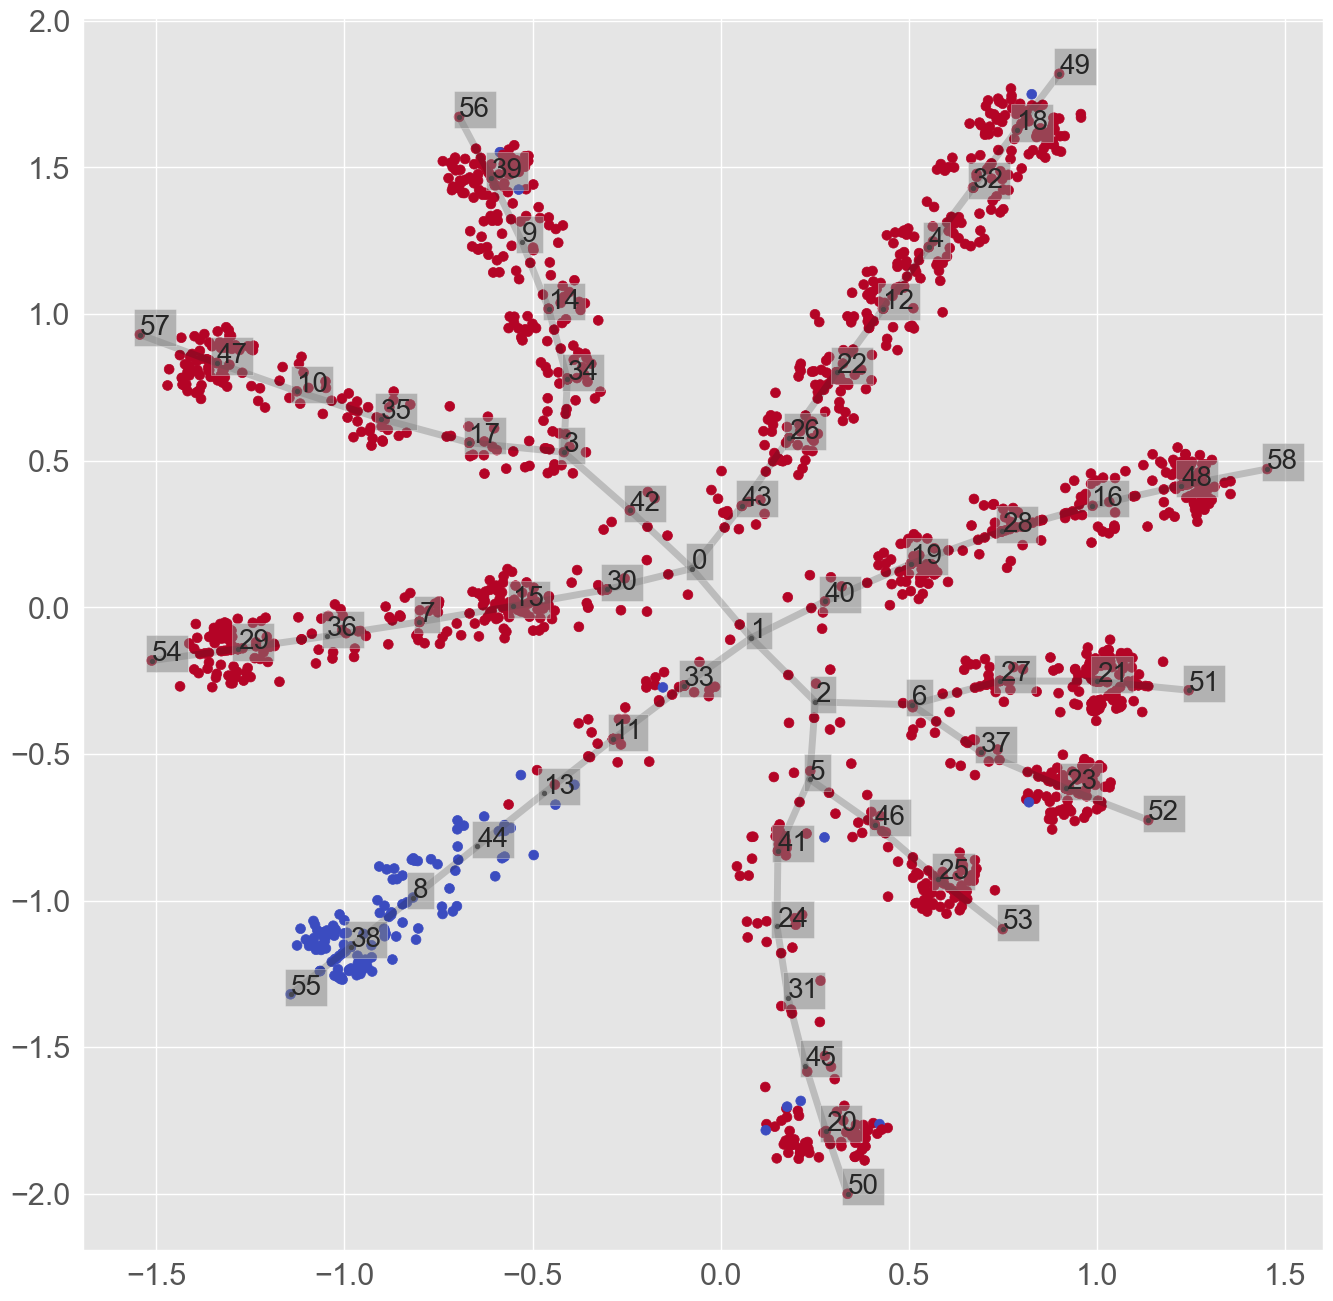

In [32]:
showEdgeNumbers=False
showNodeNumbers=True
showBranchNumbers=False
showPointNumbers=False
Color_by_feature = ''
Feature_Edge_Width = ''
Invert_Edge_Value = False
Min_Edge_Width = 5
Max_Edge_Width = 5
Big_Point_Size = 1000
Small_Point_Size = 100
Normal_Point_Size = 50
Visualize_Edge_Width_AsNodeCoordinates=True
Color_by_partitioning = False
Transparency_Alpha = 0.2
Visualize_Branch_Class_Associations = [] #list_of_branch_class_associations
cmap = 'coolwarm'
highlight_subset = []
Color_by_partitioning=False
partitioning = vec_labels_by_branches
scatter_parameter = 0.03

sns.set(palette='bright',font_scale=2)


feature = 'Diagnosis'
fig = plt.figure(figsize=(16, 16))
visualize_eltree_with_data(tree_extended,X,X_before_scaling,color,variable_names,principal_component_vectors=v,mean_vector=mean_val,Color_by_feature=feature, Feature_Edge_Width=feature,Invert_Edge_Value=Invert_Edge_Value,Min_Edge_Width=Min_Edge_Width,Max_Edge_Width=Max_Edge_Width,Visualize_Edge_Width_AsNodeCoordinates=Visualize_Edge_Width_AsNodeCoordinates, Color_by_partitioning=Color_by_partitioning, visualize_partition=partitioning, showBranchNumbers=showBranchNumbers,showEdgeNumbers=showEdgeNumbers,showNodeNumbers=showNodeNumbers,scatter_parameter=scatter_parameter,cmap=cmap,Normal_Point_Size=Normal_Point_Size,highlight_subset=highlight_subset,Big_Point_Size=Big_Point_Size,showPointNumbers=showPointNumbers,Visualize_Branch_Class_Associations=Visualize_Branch_Class_Associations)
plt.savefig('principal_tree.png', format='png', dpi=300)

In [34]:
root_node = 8

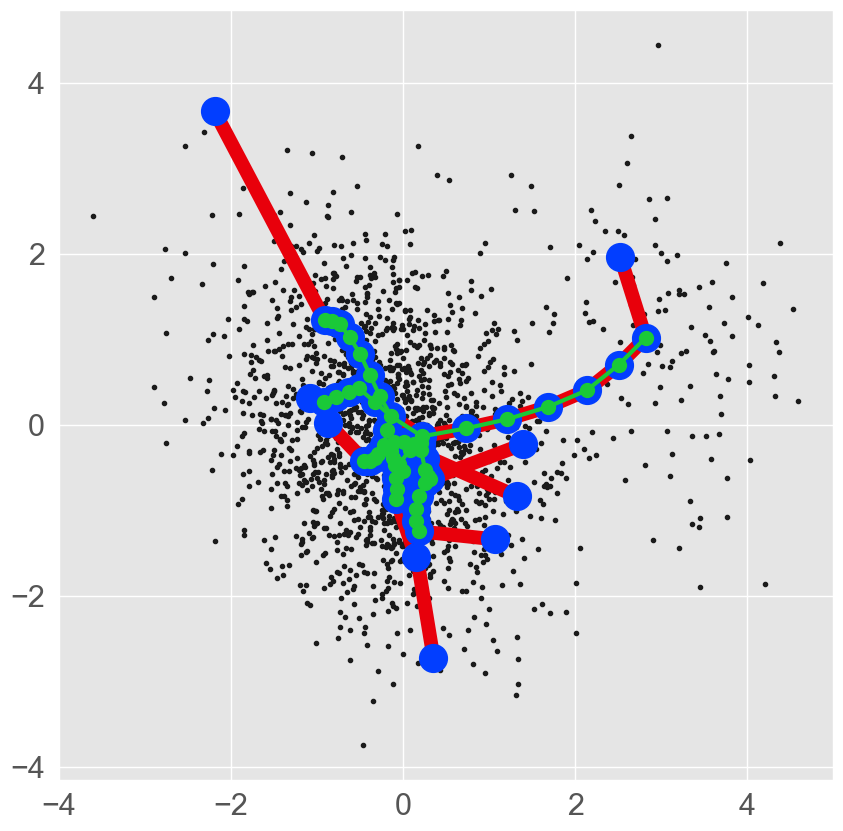

In [44]:
# Visualize how leaf extension was done

ix = 0
iy = 1

t = tree_extended
plt.figure(figsize=(10,10))
plt.plot(X[:,ix],X[:,iy],'k.')
nodes = t['NodePositions']
edges = t['Edges'][0]
for e in edges:
    plt.plot([nodes[e[0],ix],nodes[e[1],ix]],[nodes[e[0],iy],nodes[e[1],iy]],'r-',linewidth=10)
plt.plot(nodes[:,ix],nodes[:,iy],'bo',markersize=20)
    
t = tree_elpi
nodes = t['NodePositions']
edges = t['Edges'][0]
for e in edges:
    plt.plot([nodes[e[0],ix],nodes[e[1],ix]],[nodes[e[0],iy],nodes[e[1],iy]],'g-',linewidth=3)
plt.plot(nodes[:,ix],nodes[:,iy],'go',markersize=10)
    
plt.show()

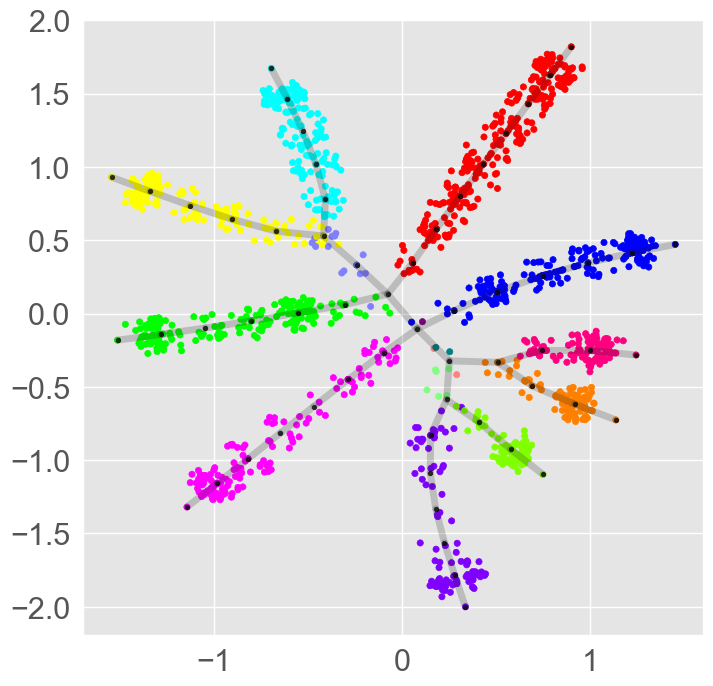

In [38]:
fig = plt.figure(figsize=(8, 8))
visualize_eltree_with_data(tree_extended,X,X_before_scaling,vec_labels_by_branches,variable_names,
                          Color_by_partitioning = True, 
                          visualize_partition = vec_labels_by_branches)
plt.show()

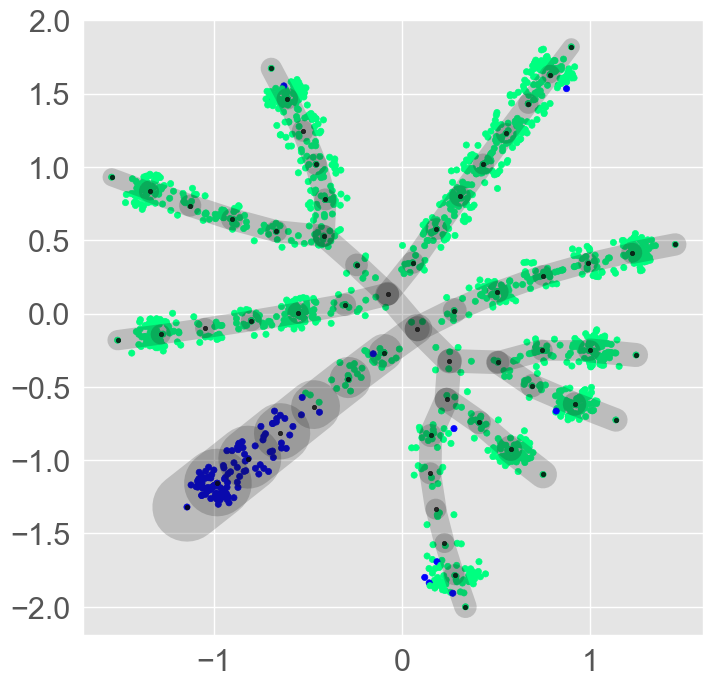

In [46]:
fig = plt.figure(figsize=(8, 8))
non_lethal_feature = 'Diagnosis'

visualize_eltree_with_data(tree_extended,X,X_before_scaling,'k',variable_names,
                            principal_component_vectors=v,mean_vector=mean_val,                           
                          Color_by_feature=non_lethal_feature, Feature_Edge_Width=non_lethal_feature,
                           Invert_Edge_Value=True,Min_Edge_Width=10,Max_Edge_Width=50,
                           Visualize_Edge_Width_AsNodeCoordinates=True,cmap='winter')
plt.show()

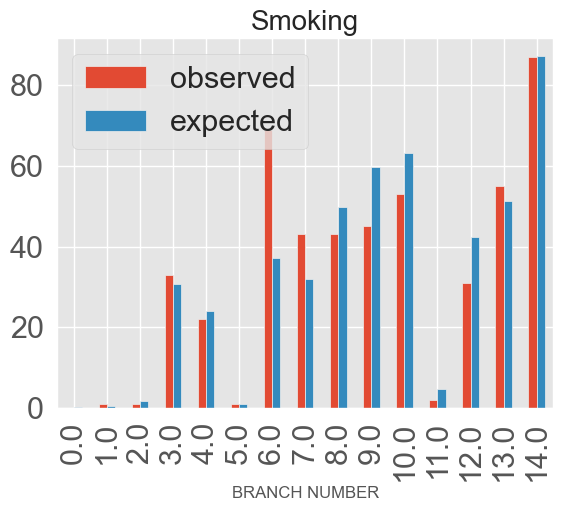

Smoking BINARY [(6.0, 0.651, 0.299381927772386)] p-value= 6.58715222720663e-08


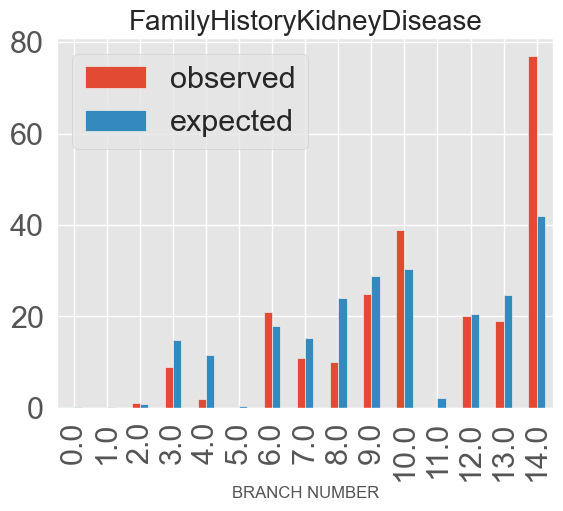

FamilyHistoryKidneyDisease BINARY [(14.0, 1.077, 0.29376376756551464)] p-value= 1.0891320661785822e-08


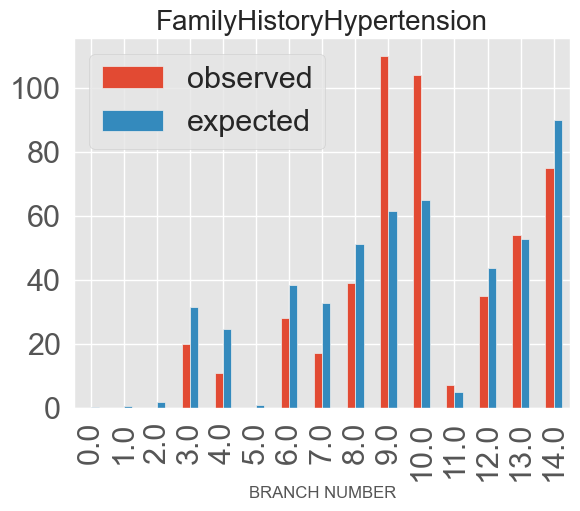

FamilyHistoryHypertension BINARY [(9.0, 0.634, 0.28292734366761574), (10.0, 0.634, 0.23004534177431774)] p-value= 3.083539180689949e-22


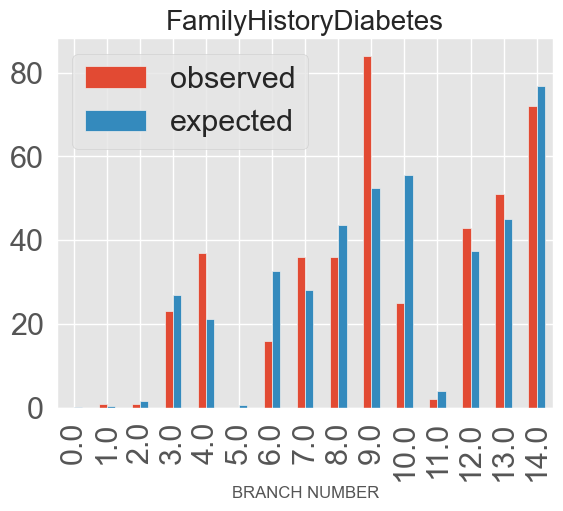

FamilyHistoryDiabetes BINARY [(4.0, 0.728, 0.27354585723622105), (9.0, 0.728, 0.23071216617210683)] p-value= 1.0169053328417666e-12


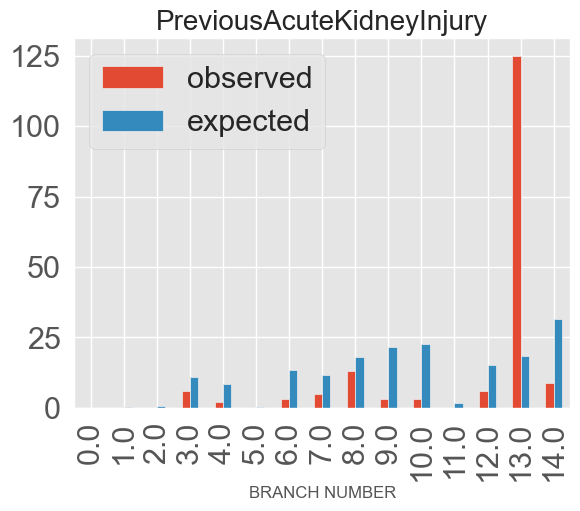

PreviousAcuteKidneyInjury BINARY [(13.0, 1.238, 0.7426470588235293)] p-value= 2.584172069324224e-156


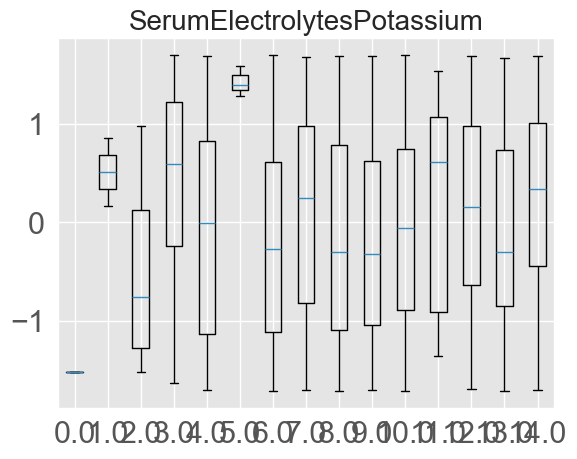

SerumElectrolytesPotassium CONTINUOUS [(5.0, 'CONTINUOUS', 2.9530324461896984)] p-value= 7.516204513074239e-10


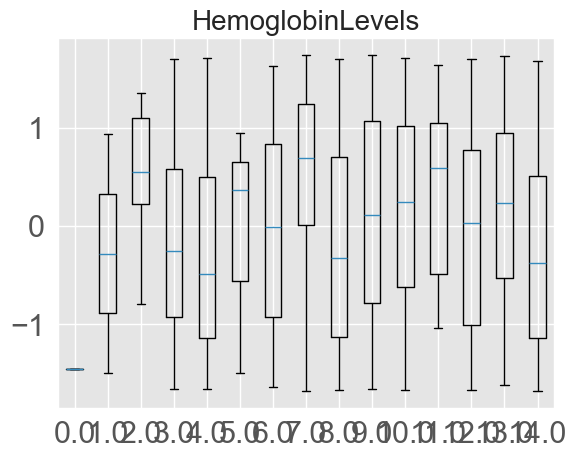

HemoglobinLevels CONTINUOUS [(7.0, 'CONTINUOUS', 2.0407287404800045)] p-value= 5.335487287491399e-16


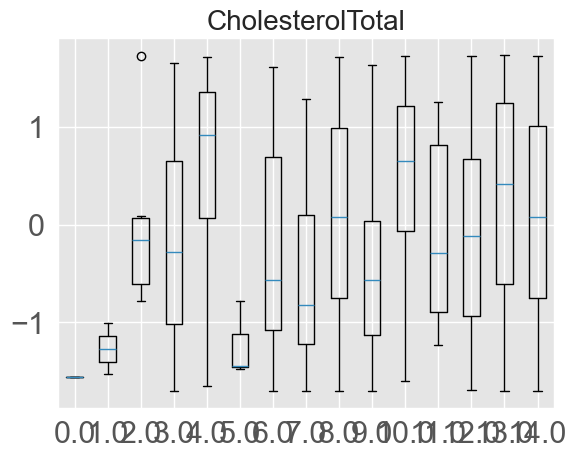

CholesterolTotal CONTINUOUS [(4.0, 'CONTINUOUS', 2.2125850905825093), (10.0, 'CONTINUOUS', 2.0361822658128084)] p-value= 3.715111898672079e-39


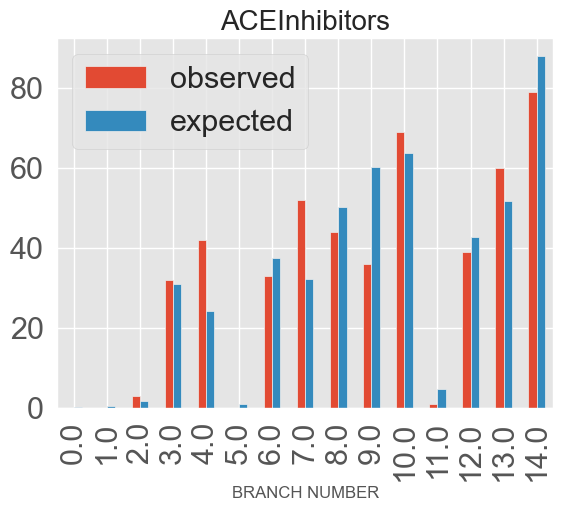

ACEInhibitors BINARY [(4.0, 0.646, 0.26851025869759143), (7.0, 0.646, 0.2352410544251779)] p-value= 2.541184002224131e-08


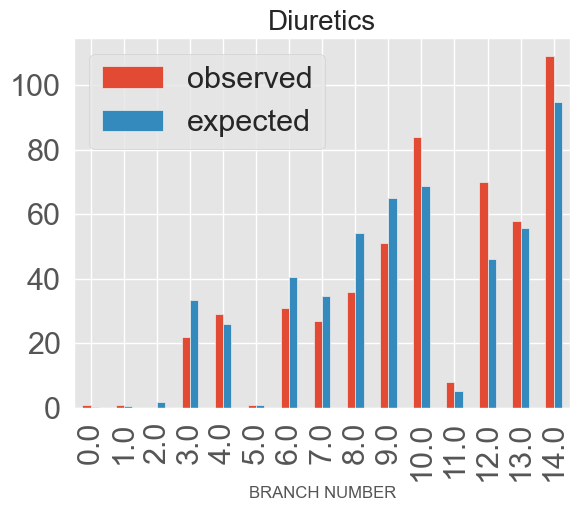

Diuretics BINARY [(12.0, 0.602, 0.20535575276350615)] p-value= 1.6467227095742922e-07


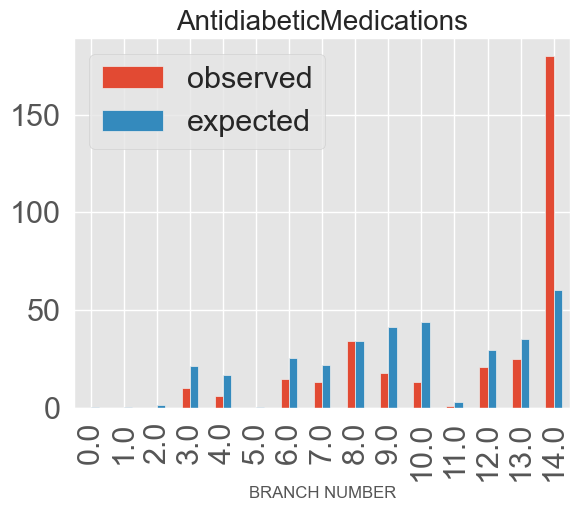

AntidiabeticMedications BINARY [(14.0, 0.869, 0.49778807668000835)] p-value= 3.139432720571587e-72


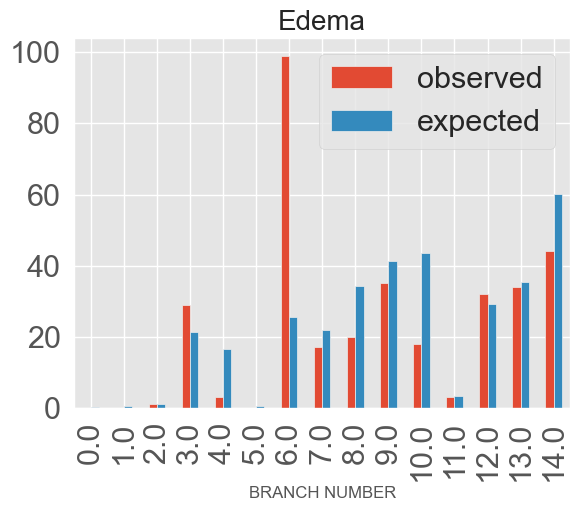

Edema BINARY [(6.0, 0.87, 0.588511794802356)] p-value= 3.7256656083362498e-59


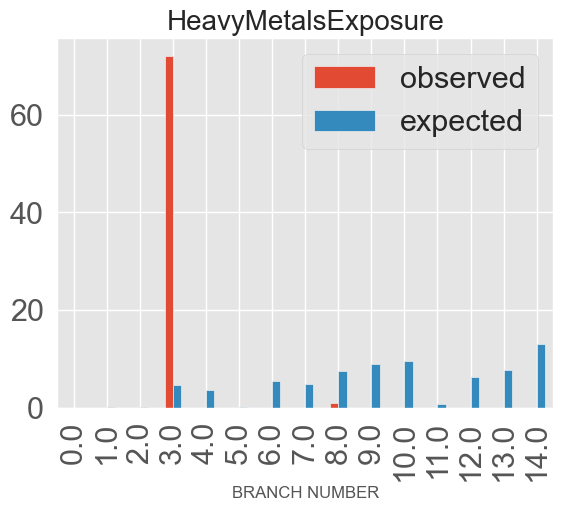

HeavyMetalsExposure BINARY [(3.0, 1.684, 0.8793986452998515)] p-value= 1.894269528393987e-225


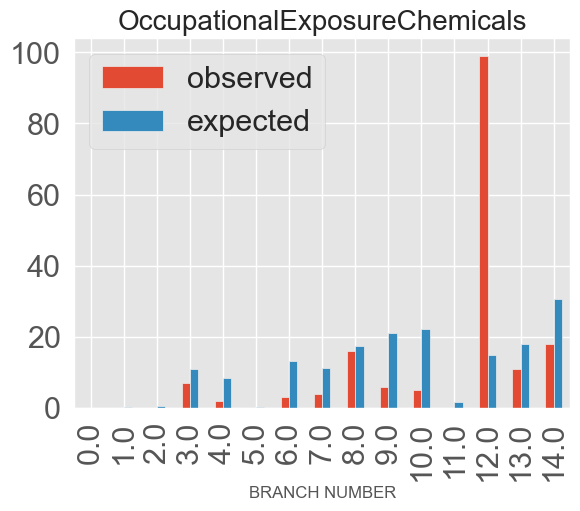

OccupationalExposureChemicals BINARY [(12.0, 1.25, 0.7376690154256332)] p-value= 2.955216271531861e-116


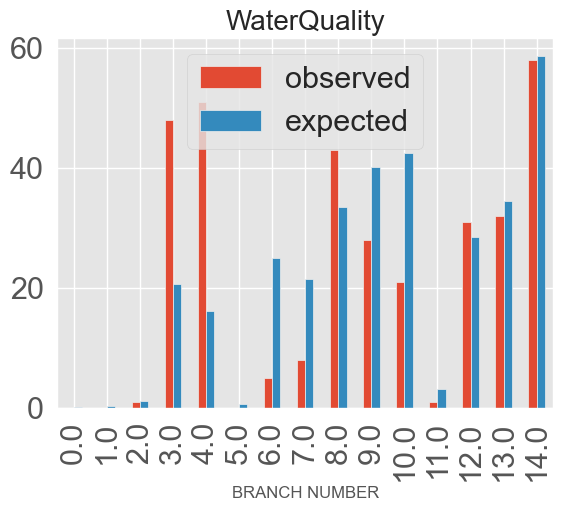

WaterQuality BINARY [(3.0, 0.884, 0.3974571586511885), (4.0, 0.884, 0.5186990118736705)] p-value= 7.963618830339109e-34


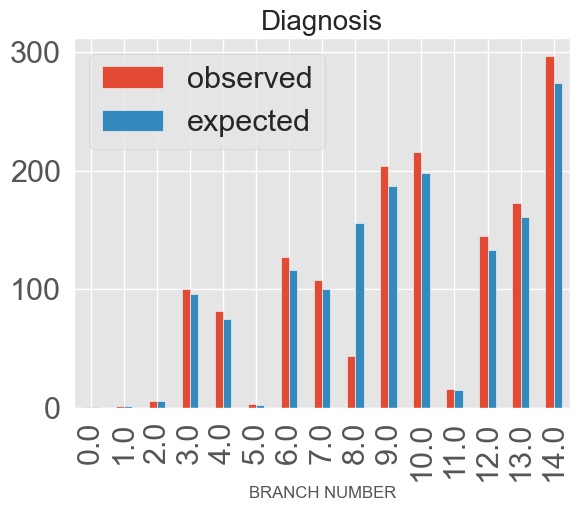

Diagnosis BINARY [(8.0, -0.319, 0.8021415270018623)] p-value= 2.749560350810819e-227


In [48]:
# Associate branches (vec_labels_by_branches) and variables (chi-square : binary, ordinal and categorical
# and ANOVA for continuous)

reload(clintraj_util)
from clintraj_util import associate_with_categorical_var
root_node = 8

Negative_Enrichment = False
Threshold_Deviation = 0.2
Threshold_Parameter = 0.2
Minimal_number_of_points = 10
pvalue_threshold_parameter = 0.05
produce_plots = True

all_branch_var_associations = {}

for k,var in enumerate(variable_names):
    var_type = variable_types[k]
    vals = X_original[:,k]
    list_of_branch_var_associations=[]
    if var_type=='BINARY' or var_type=='CATEGORICAL':
        list_of_branch_var_associations,p,stat = associate_with_categorical_var(vec_labels_by_branches,var,vals,var_type,
                                                            score_threshold=Threshold_Deviation,
                                                            verbose=False,
                                                            Negative_Enrichment=Negative_Enrichment,
                                                            Minimal_number_of_points=Minimal_number_of_points,
                                                            pvalue_threshold_parameter=pvalue_threshold_parameter,
                                                            produce_plot=produce_plots)
    if var_type=='ORDINAL' or var_type=='CONTINUOUS':
        list_of_branch_var_associations,p,stat = associate_with_categorical_var(vec_labels_by_branches,var,vals,var_type,
                                                            score_threshold=Threshold_Parameter,
                                                            verbose=False,
                                                            Negative_Enrichment=Negative_Enrichment,
                                                            Minimal_number_of_points=Minimal_number_of_points,
                                                            pvalue_threshold_parameter=pvalue_threshold_parameter,
                                                            produce_plot=produce_plots)
    if len(list_of_branch_var_associations)>0:
        print(var,var_type,list_of_branch_var_associations,'p-value=',p)
        all_branch_var_associations[var] = list_of_branch_var_associations

['HemoglobinLevels', 'ACEInhibitors', 'HeavyMetalsExposure', 'WaterQuality', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'CholesterolTotal', 'Diagnosis', 'Diuretics', 'OccupationalExposureChemicals', 'SerumElectrolytesPotassium', 'Smoking', 'Edema', 'PreviousAcuteKidneyInjury', 'FamilyHistoryKidneyDisease', 'AntidiabeticMedications']



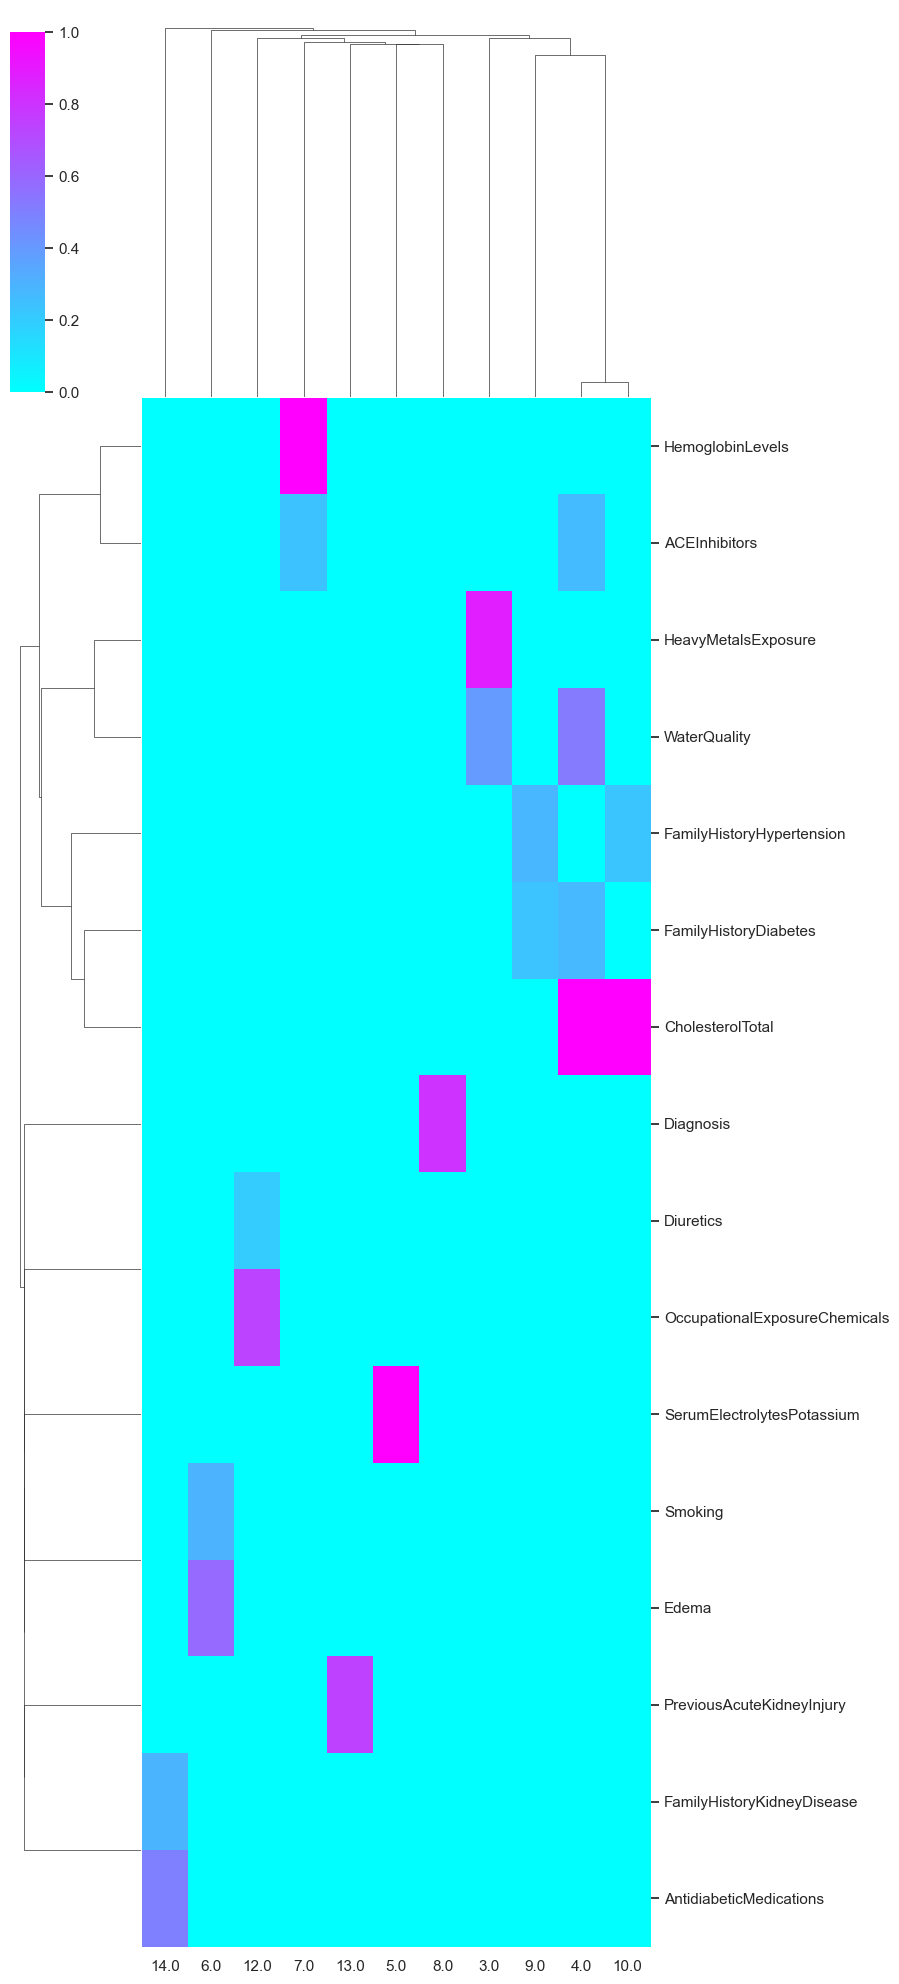

In [50]:
# Visualize associations between variables and tree branches

matrix_of_scores,keys,objects = get_matrix_of_association_scores(all_branch_var_associations)

sns.set(color_codes=True)
#g = sns.clustermap(matrix_of_scores,metric="correlation",figsize=(7, 20))
g = sns.clustermap(matrix_of_scores,metric="correlation",figsize=(7, 20),vmax=1,cmap='cool')
objects_reordered = [objects[ind] for ind in g.dendrogram_col.reordered_ind]
keys_reordered = [keys[ind] for ind in g.dendrogram_row.reordered_ind]
g.ax_heatmap.set_xticklabels(objects_reordered)
g.ax_heatmap.set_yticklabels(keys_reordered)
print(keys_reordered)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.savefig('assoc_branches.png', format='png', dpi=300)
print()

In [52]:
reload(clintraj_eltree)
from clintraj_eltree import convert_elpigraph_to_igraph, extract_trajectories, quantify_pseudotime

# Quantify pseudo-time

all_trajectories,all_trajectories_edges = extract_trajectories(tree_extended,root_node)
print(len(all_trajectories),' trajectories found.')
ProjStruct = project_on_tree(X,tree_extended)
PseudoTimeTraj = quantify_pseudotime(all_trajectories,all_trajectories_edges,ProjStruct)
# add information about bifurcation points
g = convert_elpigraph_to_igraph(tree_extended)
degs = g.degree()
for pss in PseudoTimeTraj:
    traj = pss['Trajectory']
    branching_marks = []
    for i,n in enumerate(traj):
        if degs[n]>2 and i>0:
            branching_marks.append(i)
    pss['BranchingPoints'] = branching_marks
    #print(n,branching_marks)

10  trajectories found.


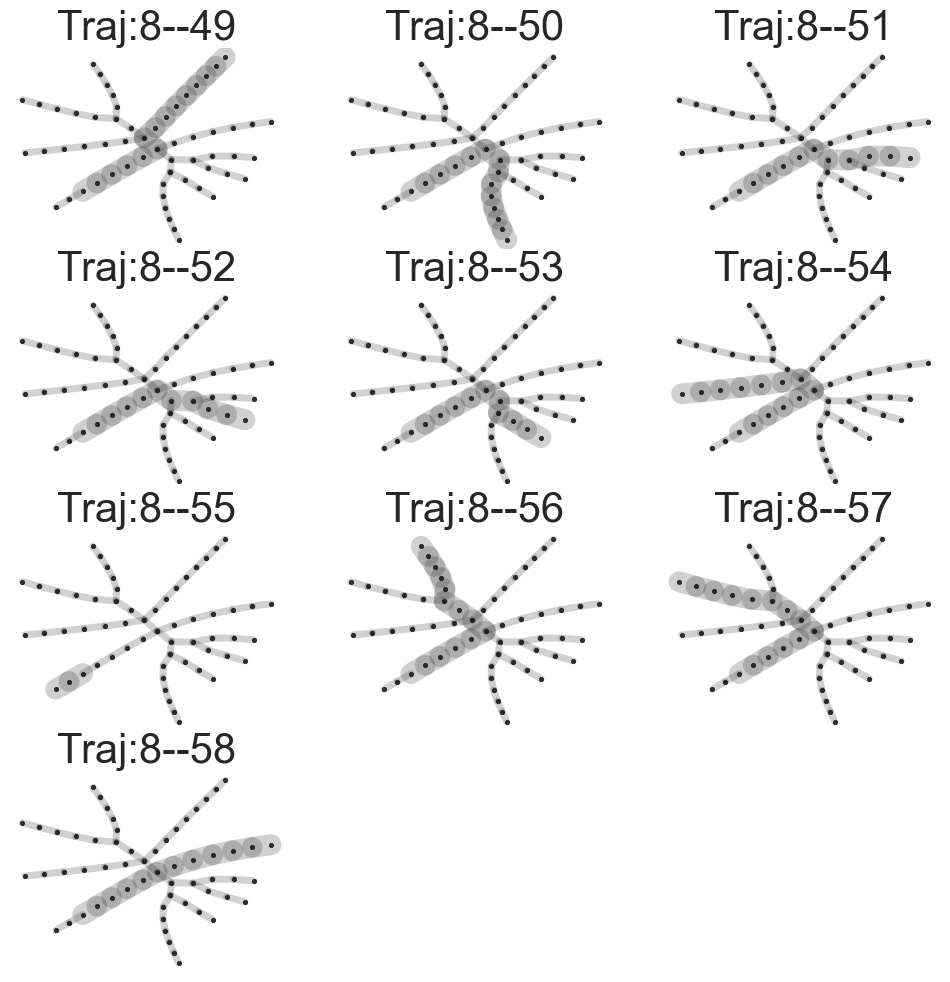

In [54]:
# Visualize all trajectories

reload(clintraj_eltree)
from clintraj_eltree import visualize_eltree_with_data,pseudo_time_trajectory,extract_trajectories,quantify_pseudotime

n_subplots_x, n_subplots_y = 4, 3
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 12))

for i,pstt in enumerate(PseudoTimeTraj):
    points = list(pstt['Points'])
    X_fake = np.zeros((X.shape[0],1))
    X_fake[points,0] = 1.0
    TrajName = 'Traj:'+str(pstt['Trajectory'][0])+'--'+str(pstt['Trajectory'][-1])
    ax = fig.add_subplot(n_subplots_x,n_subplots_y,i+1)
    plt.title(TrajName,fontsize=30)
    visualize_eltree_with_data(tree_extended,X,X_fake,color,['Traj'],
                          principal_component_vectors=v,mean_vector=mean_val,
                          Min_Edge_Width=5,Max_Edge_Width=15,Normal_Point_Size = 0,
                          Color_by_feature='', Feature_Edge_Width='Traj',
                          Visualize_Edge_Width_AsNodeCoordinates=False)
    plt.axis('off')
    plt.savefig('trajectories.png', format='png', dpi=300)

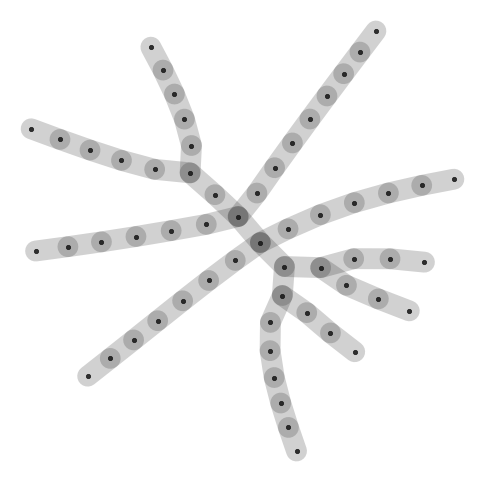

In [56]:
# produce principal tree scaffold image

fig = plt.figure(figsize=(6, 6))
visualize_eltree_with_data(tree_extended,X,X_fake,color,['Traj'],
                           principal_component_vectors=v,mean_vector=mean_val,
                          Min_Edge_Width=15,Max_Edge_Width=15,Normal_Point_Size = 0,
                          Color_by_feature='', Feature_Edge_Width='Traj',
                          Visualize_Edge_Width_AsNodeCoordinates=False)
plt.axis('off')
plt.savefig('tree_structure.png', format='png', dpi=600)

In [54]:
print(df.columns)

Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'Medi

Gender BINARY
Ethnicity ORDINAL
SocioeconomicStatus ORDINAL
EducationLevel ORDINAL
BMI CONTINUOUS
Smoking BINARY
AlcoholConsumption CONTINUOUS
PhysicalActivity CONTINUOUS
DietQuality CONTINUOUS
SleepQuality CONTINUOUS
FamilyHistoryKidneyDisease BINARY
FamilyHistoryHypertension BINARY
FamilyHistoryDiabetes BINARY
PreviousAcuteKidneyInjury BINARY


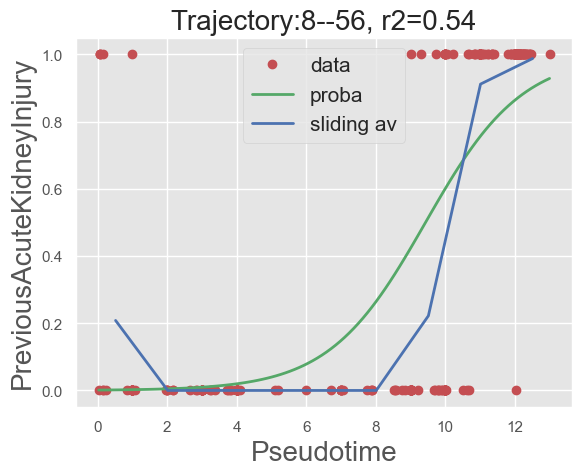

7 ('Trajectory:8--56', 'PreviousAcuteKidneyInjury', 0.5402231356429827)
[('Trajectory:8--56', 'PreviousAcuteKidneyInjury', 0.5402231356429827)]
UrinaryTractInfections BINARY
SystolicBP CONTINUOUS


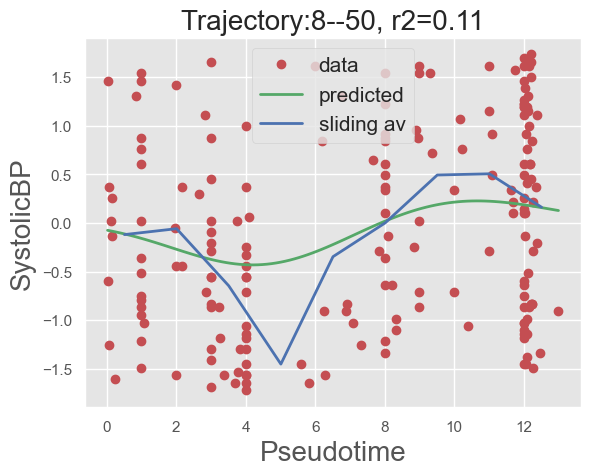

1 ('Trajectory:8--50', 'SystolicBP', 0.11122317010994254)


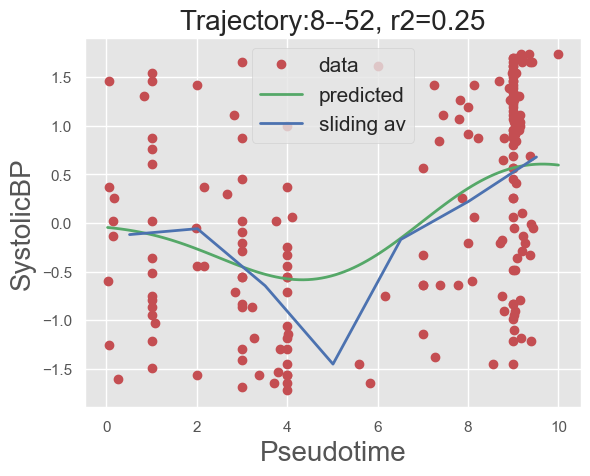

3 ('Trajectory:8--52', 'SystolicBP', 0.25030802672792696)


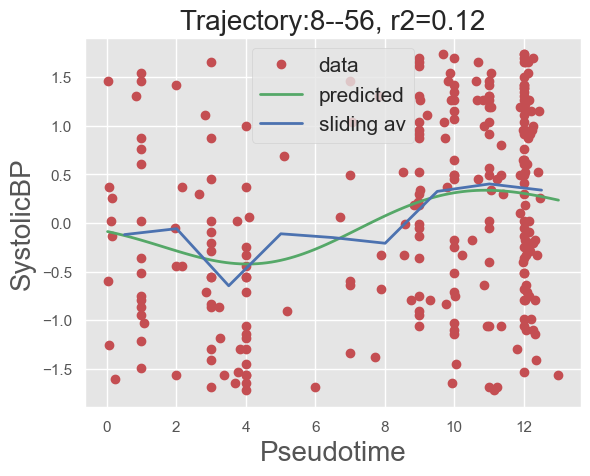

7 ('Trajectory:8--56', 'SystolicBP', 0.12400999543365332)


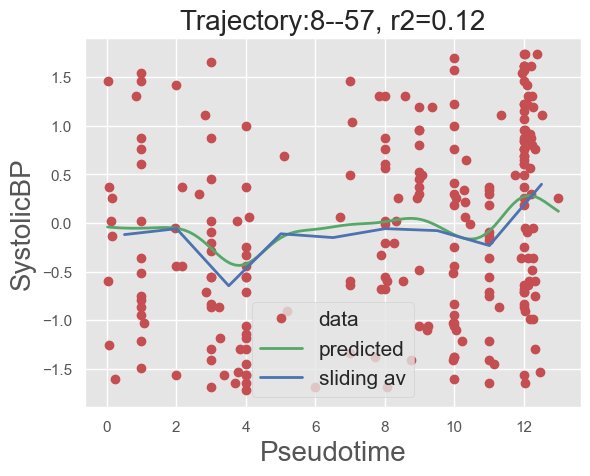

8 ('Trajectory:8--57', 'SystolicBP', 0.12261082260289669)


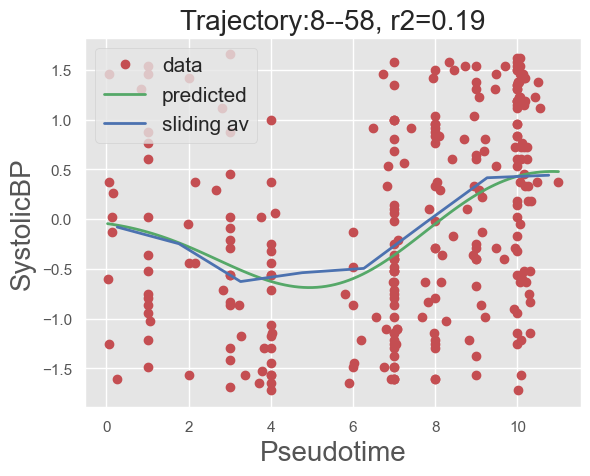

9 ('Trajectory:8--58', 'SystolicBP', 0.19491754511107984)
[('Trajectory:8--50', 'SystolicBP', 0.11122317010994254), ('Trajectory:8--52', 'SystolicBP', 0.25030802672792696), ('Trajectory:8--56', 'SystolicBP', 0.12400999543365332), ('Trajectory:8--57', 'SystolicBP', 0.12261082260289669), ('Trajectory:8--58', 'SystolicBP', 0.19491754511107984)]
DiastolicBP CONTINUOUS
FastingBloodSugar CONTINUOUS


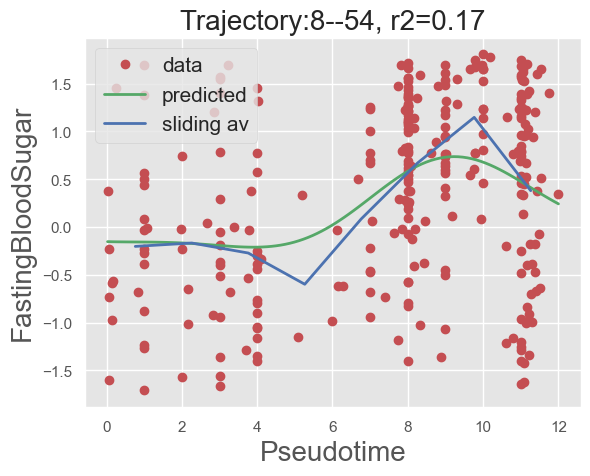

5 ('Trajectory:8--54', 'FastingBloodSugar', 0.16708244853620668)
[('Trajectory:8--54', 'FastingBloodSugar', 0.16708244853620668)]
HbA1c CONTINUOUS


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SerumCreatinine CONTINUOUS


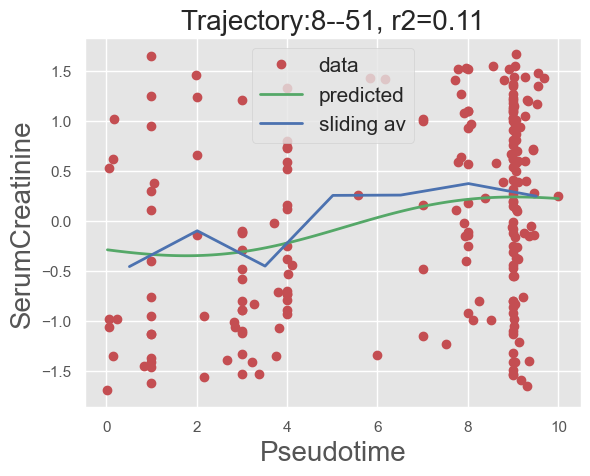

2 ('Trajectory:8--51', 'SerumCreatinine', 0.10909259420071704)


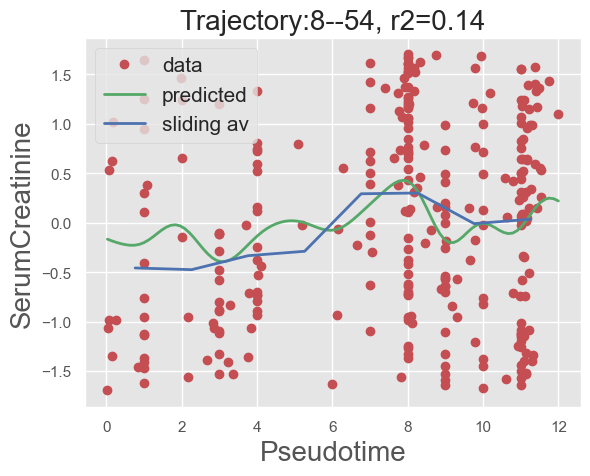

5 ('Trajectory:8--54', 'SerumCreatinine', 0.14221702660896074)
[('Trajectory:8--51', 'SerumCreatinine', 0.10909259420071704), ('Trajectory:8--54', 'SerumCreatinine', 0.14221702660896074)]
BUNLevels CONTINUOUS


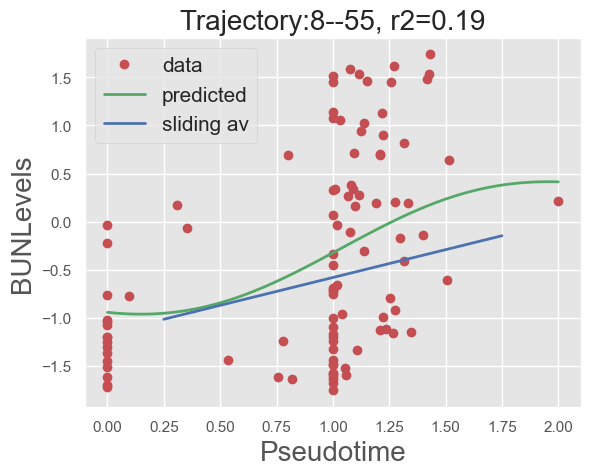

6 ('Trajectory:8--55', 'BUNLevels', 0.18998215369290417)
[('Trajectory:8--55', 'BUNLevels', 0.18998215369290417)]
GFR CONTINUOUS


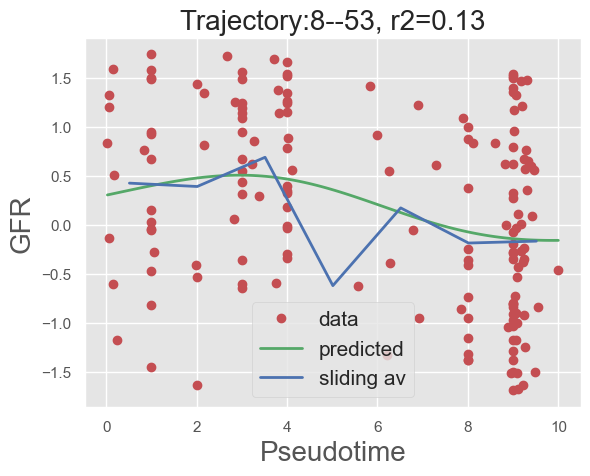

4 ('Trajectory:8--53', 'GFR', 0.13337846700319078)


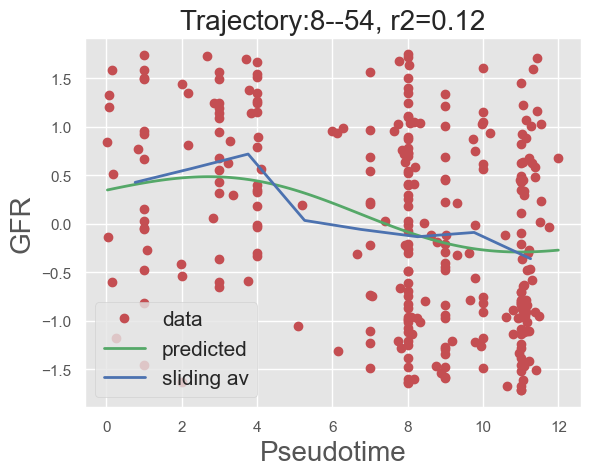

5 ('Trajectory:8--54', 'GFR', 0.12414522784679771)


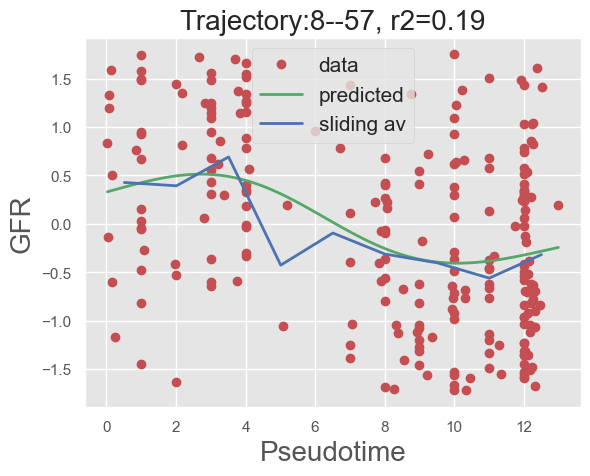

8 ('Trajectory:8--57', 'GFR', 0.19416368745676094)


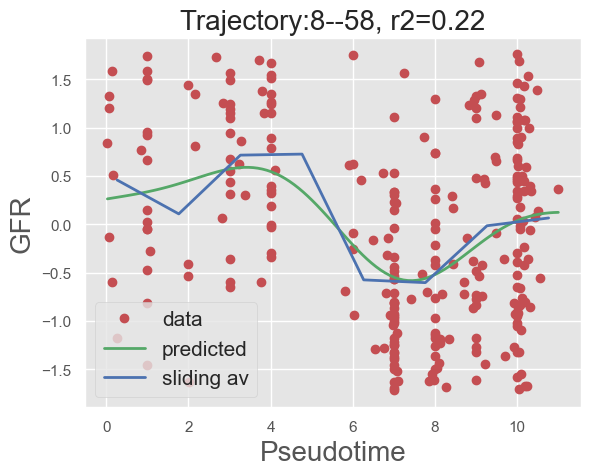

9 ('Trajectory:8--58', 'GFR', 0.2224953010183658)
[('Trajectory:8--53', 'GFR', 0.13337846700319078), ('Trajectory:8--54', 'GFR', 0.12414522784679771), ('Trajectory:8--57', 'GFR', 0.19416368745676094), ('Trajectory:8--58', 'GFR', 0.2224953010183658)]
ProteinInUrine CONTINUOUS


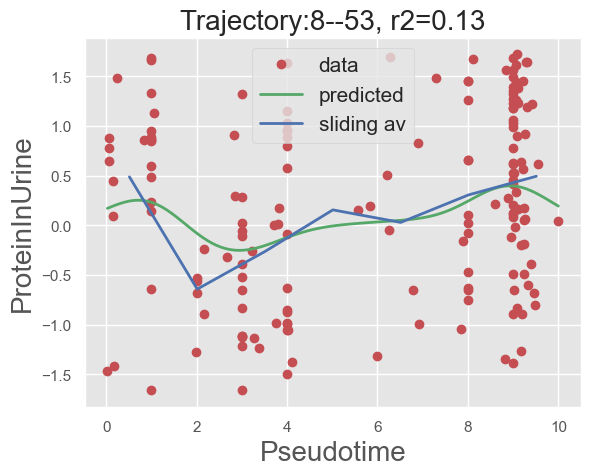

4 ('Trajectory:8--53', 'ProteinInUrine', 0.12628284279792723)


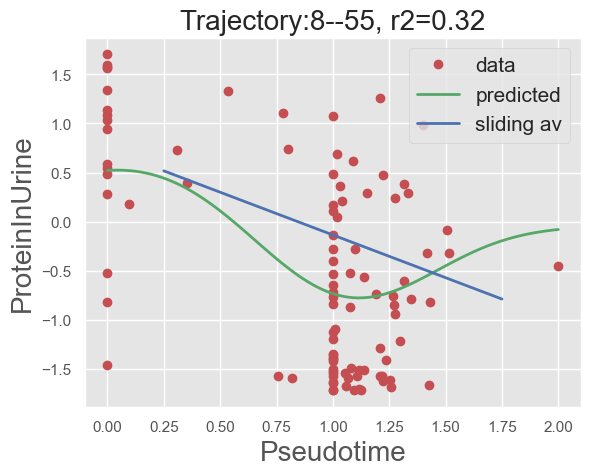

6 ('Trajectory:8--55', 'ProteinInUrine', 0.32273850108883273)
[('Trajectory:8--53', 'ProteinInUrine', 0.12628284279792723), ('Trajectory:8--55', 'ProteinInUrine', 0.32273850108883273)]
ACR CONTINUOUS


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-100. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


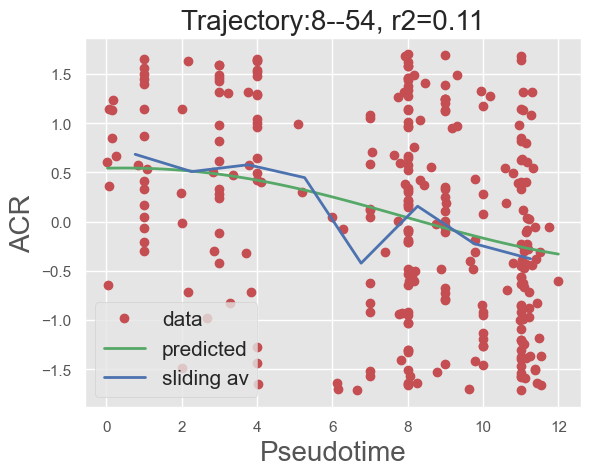

5 ('Trajectory:8--54', 'ACR', 0.11169563327690102)


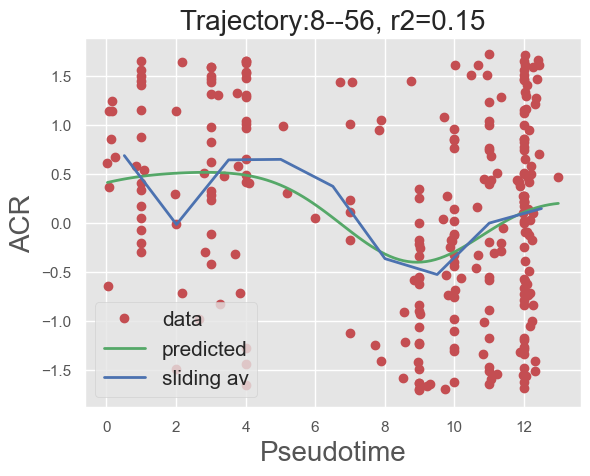

7 ('Trajectory:8--56', 'ACR', 0.14676453889498342)


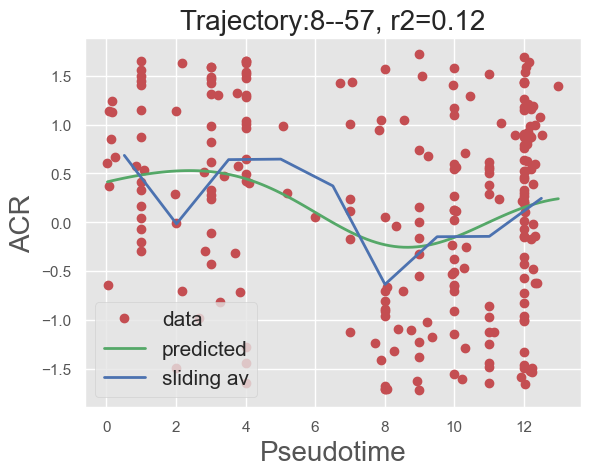

8 ('Trajectory:8--57', 'ACR', 0.1184242471174567)
[('Trajectory:8--54', 'ACR', 0.11169563327690102), ('Trajectory:8--56', 'ACR', 0.14676453889498342), ('Trajectory:8--57', 'ACR', 0.1184242471174567)]
SerumElectrolytesSodium CONTINUOUS


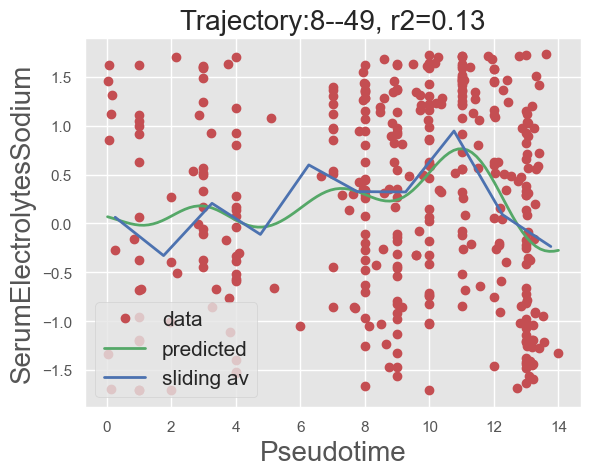

0 ('Trajectory:8--49', 'SerumElectrolytesSodium', 0.13439338982001492)
[('Trajectory:8--49', 'SerumElectrolytesSodium', 0.13439338982001492)]
SerumElectrolytesPotassium CONTINUOUS


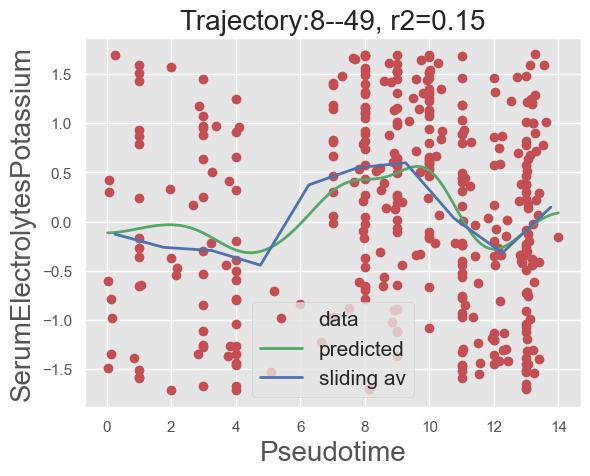

0 ('Trajectory:8--49', 'SerumElectrolytesPotassium', 0.1519763565914677)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-100. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[('Trajectory:8--49', 'SerumElectrolytesPotassium', 0.1519763565914677)]
SerumElectrolytesCalcium CONTINUOUS
SerumElectrolytesPhosphorus CONTINUOUS
HemoglobinLevels CONTINUOUS


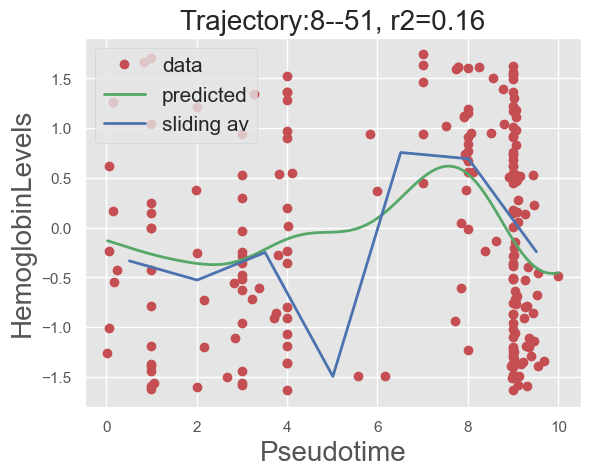

2 ('Trajectory:8--51', 'HemoglobinLevels', 0.16003097837874902)


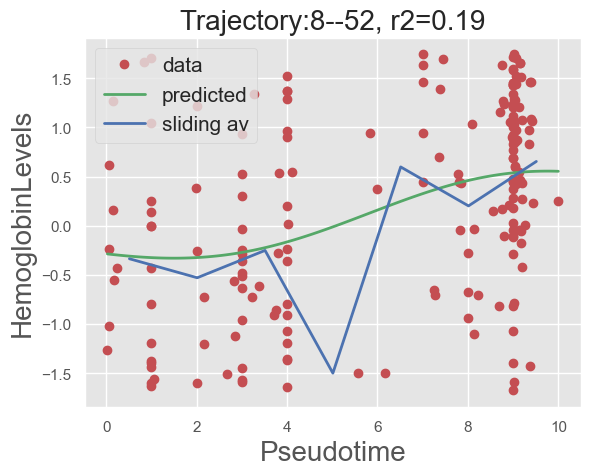

3 ('Trajectory:8--52', 'HemoglobinLevels', 0.1901626977979144)
[('Trajectory:8--51', 'HemoglobinLevels', 0.16003097837874902), ('Trajectory:8--52', 'HemoglobinLevels', 0.1901626977979144)]
CholesterolTotal CONTINUOUS


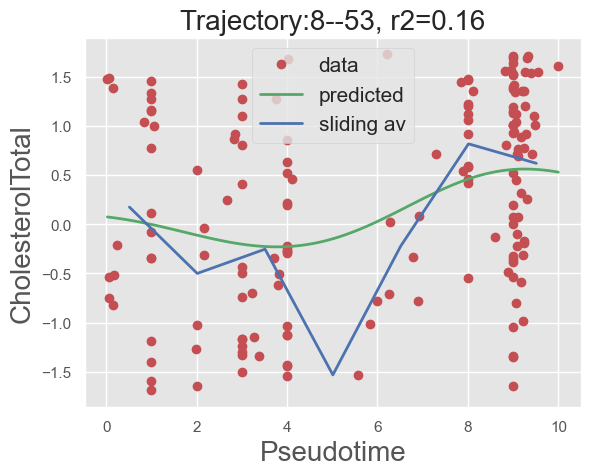

4 ('Trajectory:8--53', 'CholesterolTotal', 0.16133799796450776)


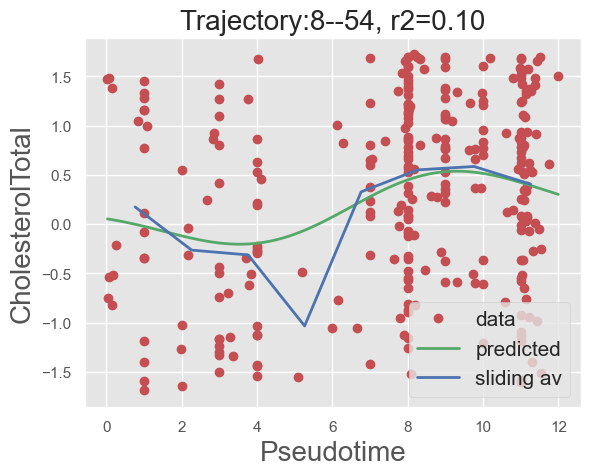

5 ('Trajectory:8--54', 'CholesterolTotal', 0.10289007568768316)
[('Trajectory:8--53', 'CholesterolTotal', 0.16133799796450776), ('Trajectory:8--54', 'CholesterolTotal', 0.10289007568768316)]
CholesterolLDL CONTINUOUS
CholesterolHDL CONTINUOUS


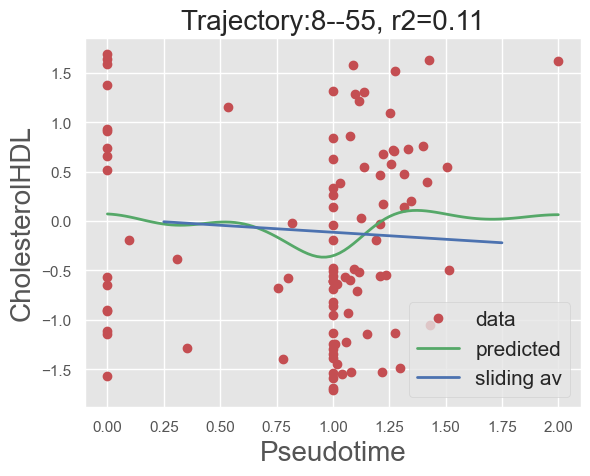

6 ('Trajectory:8--55', 'CholesterolHDL', 0.1081409205652285)


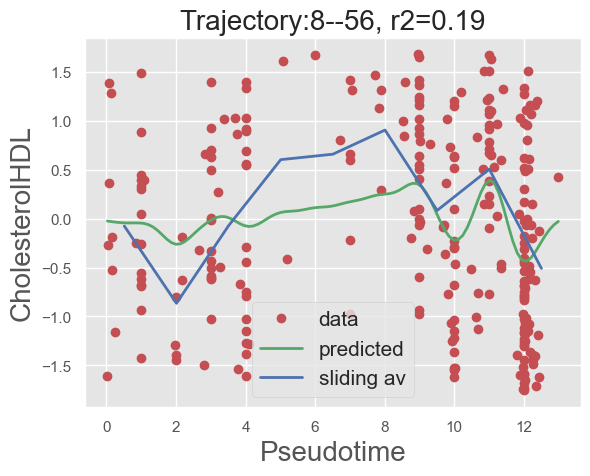

7 ('Trajectory:8--56', 'CholesterolHDL', 0.1903519047013399)
[('Trajectory:8--55', 'CholesterolHDL', 0.1081409205652285), ('Trajectory:8--56', 'CholesterolHDL', 0.1903519047013399)]
CholesterolTriglycerides CONTINUOUS


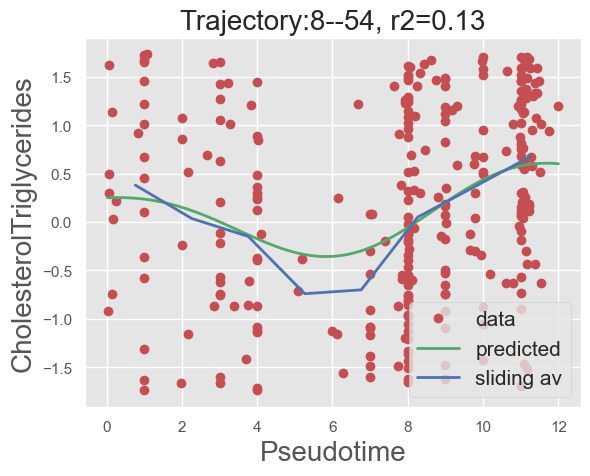

5 ('Trajectory:8--54', 'CholesterolTriglycerides', 0.1280828459825034)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-100. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[('Trajectory:8--54', 'CholesterolTriglycerides', 0.1280828459825034)]
ACEInhibitors BINARY
Diuretics BINARY
NSAIDsUse CONTINUOUS
Statins BINARY
AntidiabeticMedications BINARY
Edema BINARY


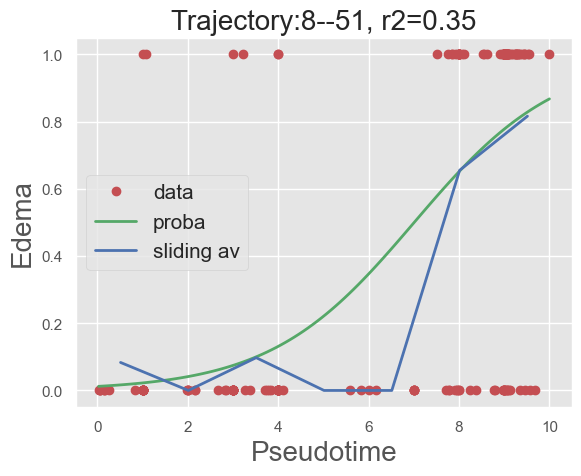

2 ('Trajectory:8--51', 'Edema', 0.3460933888118356)
[('Trajectory:8--51', 'Edema', 0.3460933888118356)]
FatigueLevels CONTINUOUS


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-100. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


NauseaVomiting CONTINUOUS
MuscleCramps CONTINUOUS
Itching CONTINUOUS
QualityOfLifeScore CONTINUOUS
HeavyMetalsExposure BINARY


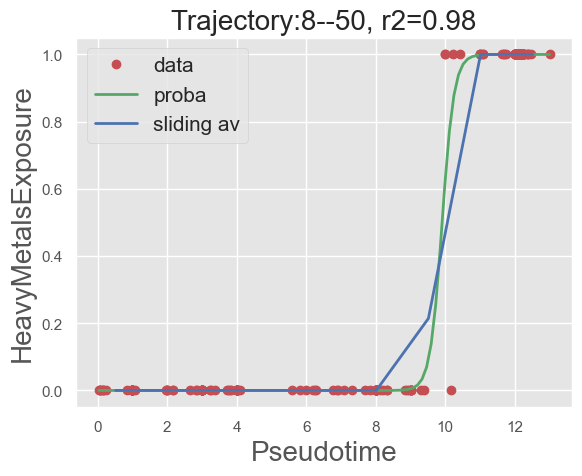

1 ('Trajectory:8--50', 'HeavyMetalsExposure', 0.9773391812865497)
[('Trajectory:8--50', 'HeavyMetalsExposure', 0.9773391812865497)]
OccupationalExposureChemicals BINARY


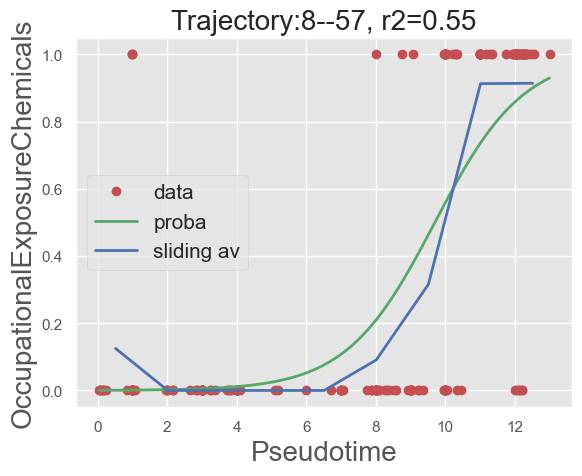

8 ('Trajectory:8--57', 'OccupationalExposureChemicals', 0.549609317411175)
[('Trajectory:8--57', 'OccupationalExposureChemicals', 0.549609317411175)]
WaterQuality BINARY
MedicalCheckupsFrequency CONTINUOUS
MedicationAdherence CONTINUOUS
HealthLiteracy CONTINUOUS
Diagnosis BINARY


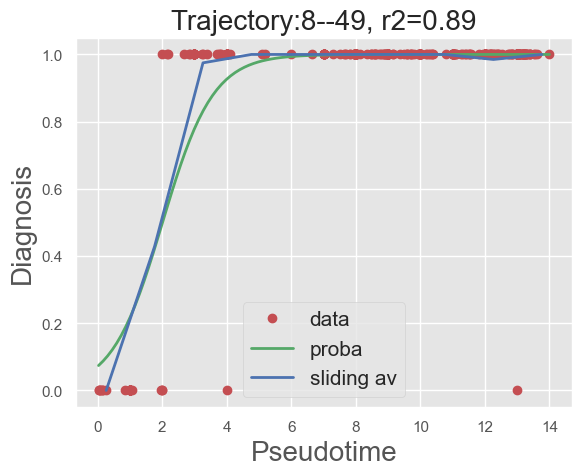

0 ('Trajectory:8--49', 'Diagnosis', 0.8878307939053729)


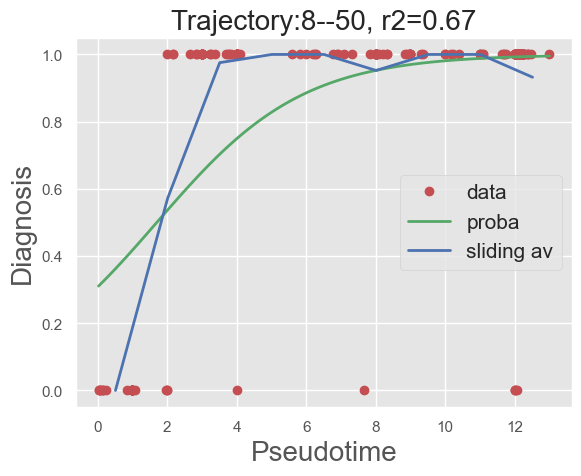

1 ('Trajectory:8--50', 'Diagnosis', 0.6684491978609626)


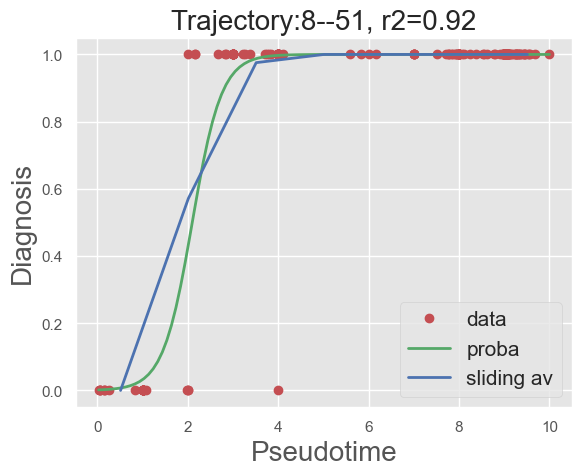

2 ('Trajectory:8--51', 'Diagnosis', 0.9174603174603174)


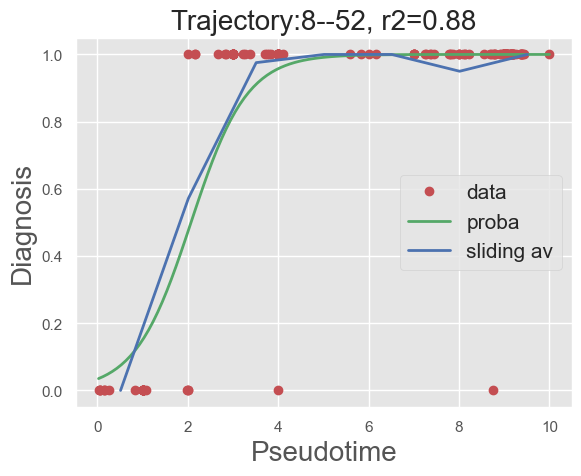

3 ('Trajectory:8--52', 'Diagnosis', 0.877443443883154)


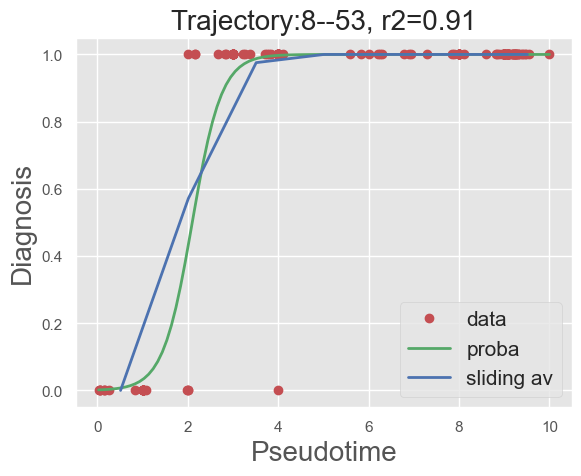

4 ('Trajectory:8--53', 'Diagnosis', 0.9137566137566138)


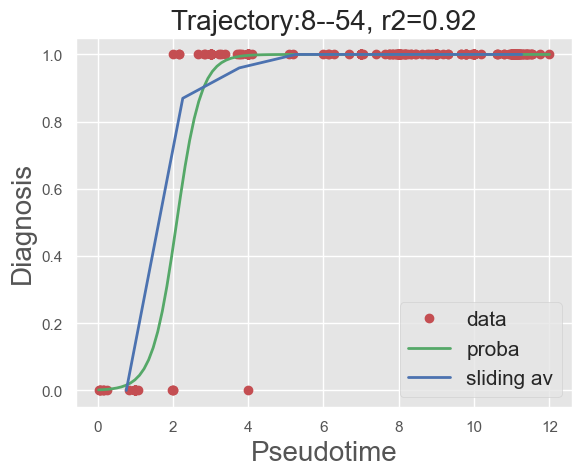

5 ('Trajectory:8--54', 'Diagnosis', 0.920966865833786)


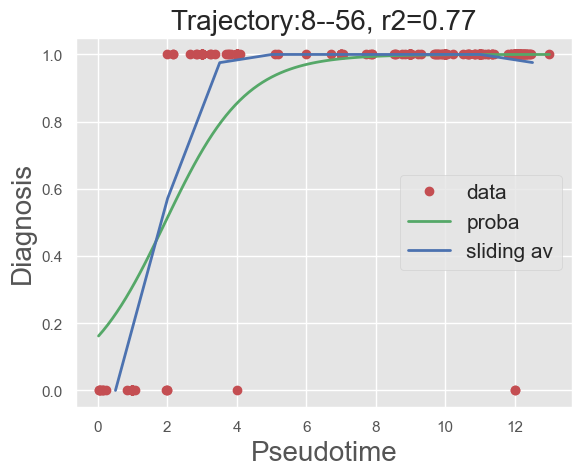

7 ('Trajectory:8--56', 'Diagnosis', 0.7740259740259741)


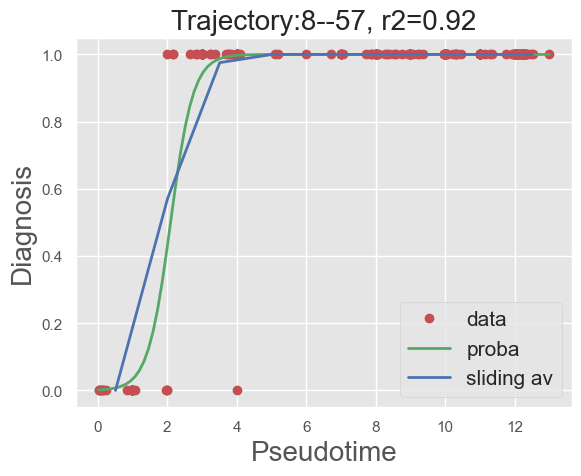

8 ('Trajectory:8--57', 'Diagnosis', 0.9189095928226363)


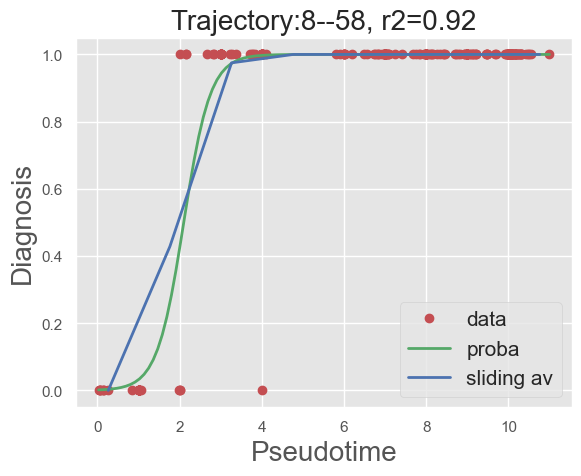

9 ('Trajectory:8--58', 'Diagnosis', 0.9204742625795257)
[('Trajectory:8--49', 'Diagnosis', 0.8878307939053729), ('Trajectory:8--50', 'Diagnosis', 0.6684491978609626), ('Trajectory:8--51', 'Diagnosis', 0.9174603174603174), ('Trajectory:8--52', 'Diagnosis', 0.877443443883154), ('Trajectory:8--53', 'Diagnosis', 0.9137566137566138), ('Trajectory:8--54', 'Diagnosis', 0.920966865833786), ('Trajectory:8--56', 'Diagnosis', 0.7740259740259741), ('Trajectory:8--57', 'Diagnosis', 0.9189095928226363), ('Trajectory:8--58', 'Diagnosis', 0.9204742625795257)]


In [58]:

reload(clintraj_eltree)
from clintraj_eltree import regression_of_variable_with_trajectories


R2_Threshold = 0.3
R2_Threshold_For_Complications = 0.1
producePlot = True
all_trajectory_variable_associations = {}
complication_variables = ['AlcoholConsumption',  'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'HeavyMetalsExposure' 'OccupationalExposureChemicals',
       
]


for k,var in enumerate(variable_names):
    print(var,variable_types[variable_names.index(var)])
    if var in complication_variables:
        r2th = R2_Threshold_For_Complications
    else:
        r2th = R2_Threshold
    List_of_Associations = regression_of_variable_with_trajectories(PseudoTimeTraj,var,variable_names,
                                                                    variable_types,X_original,R2_Threshold=r2th,
                                                                    producePlot=producePlot,
                                                                    Continuous_Regression_Type='gpr',
                                                                    verbose=True)
    if len(List_of_Associations)>0:
        print(List_of_Associations)
        all_trajectory_variable_associations[var]=List_of_Associations

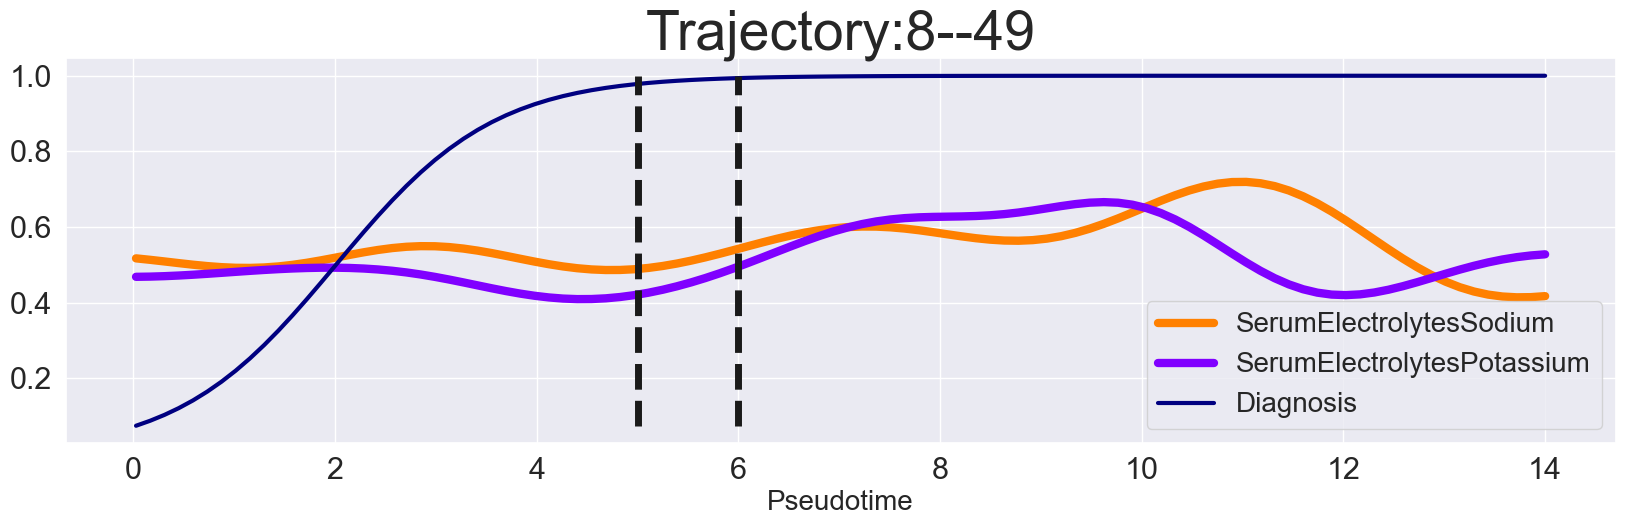

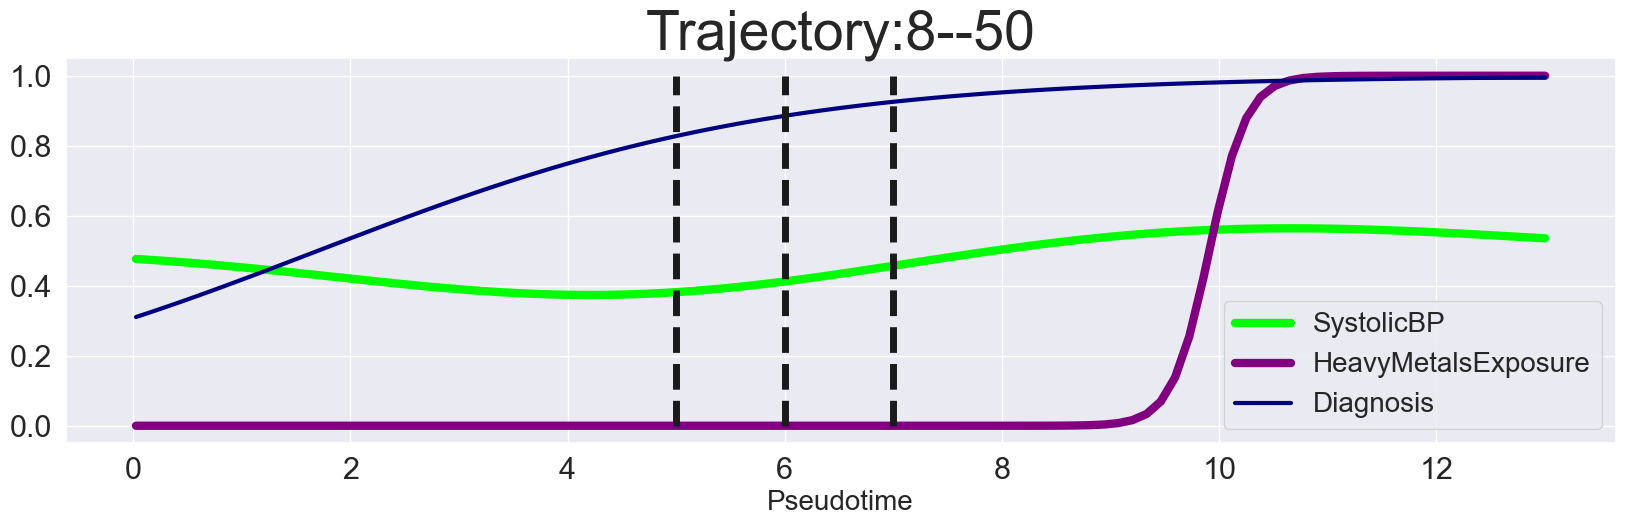

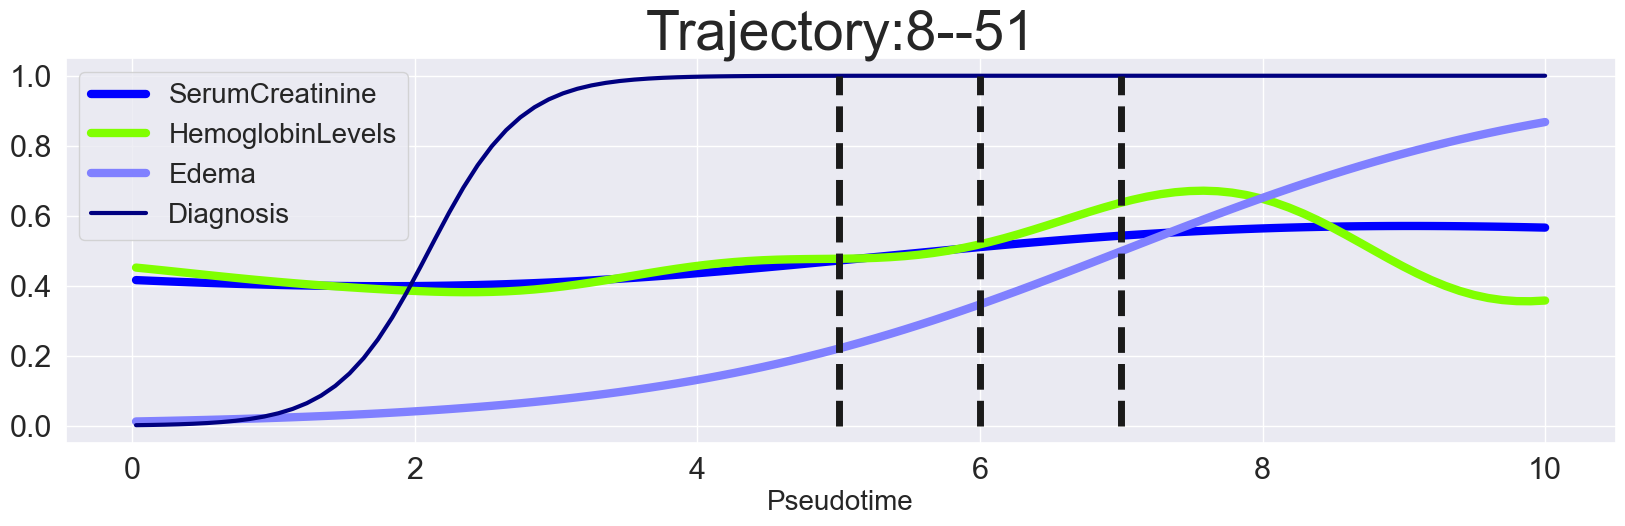

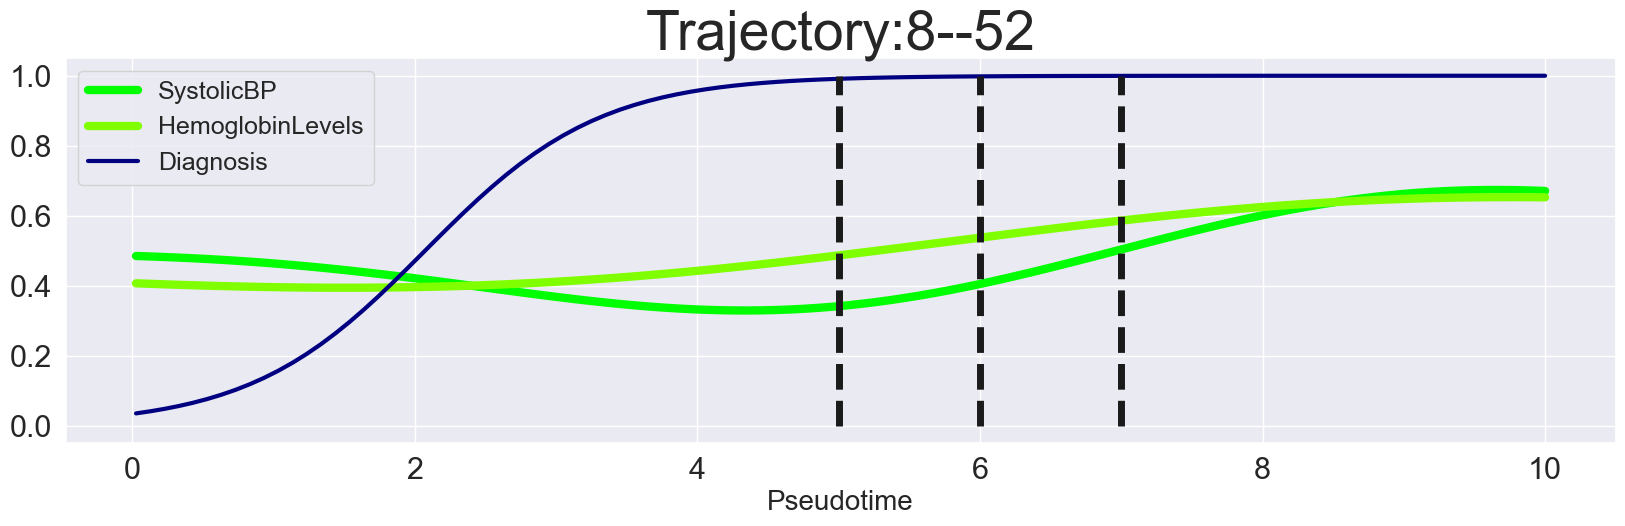

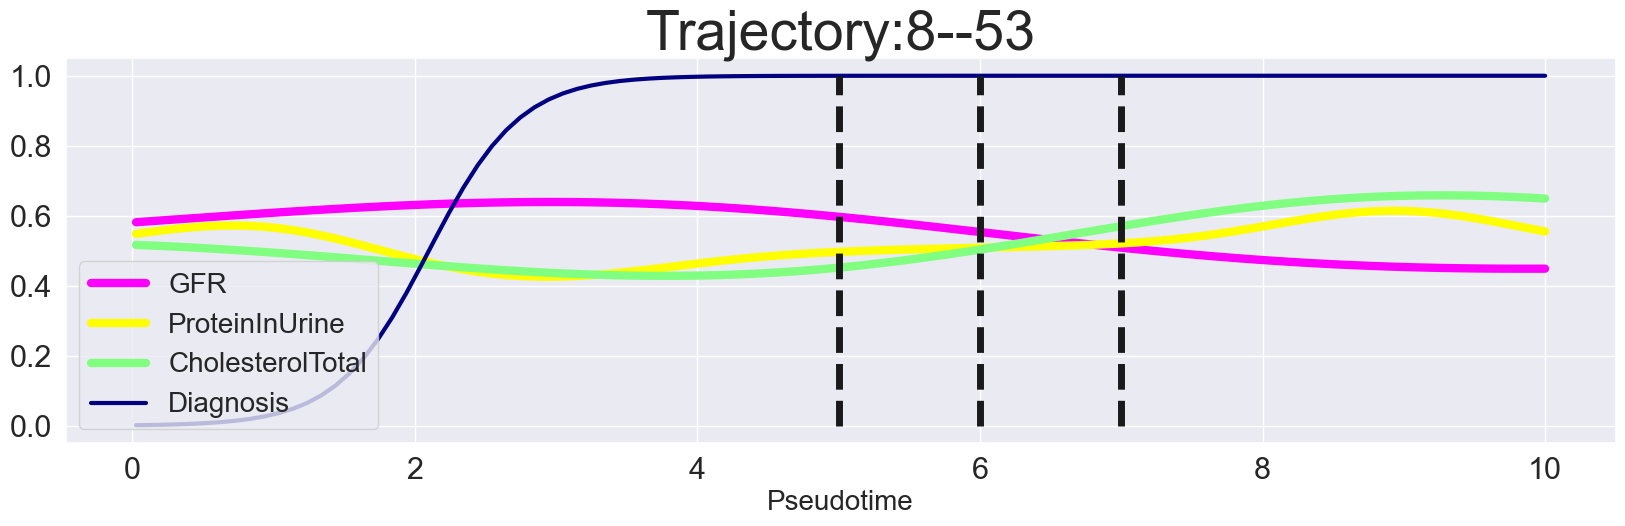

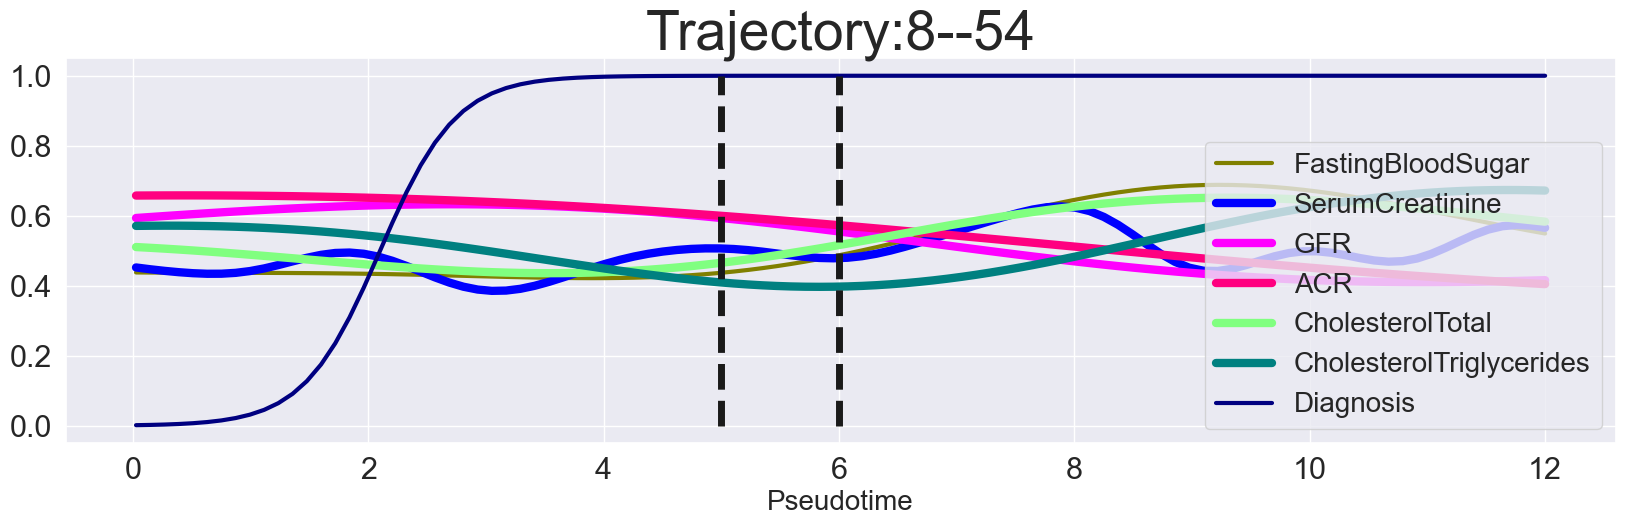

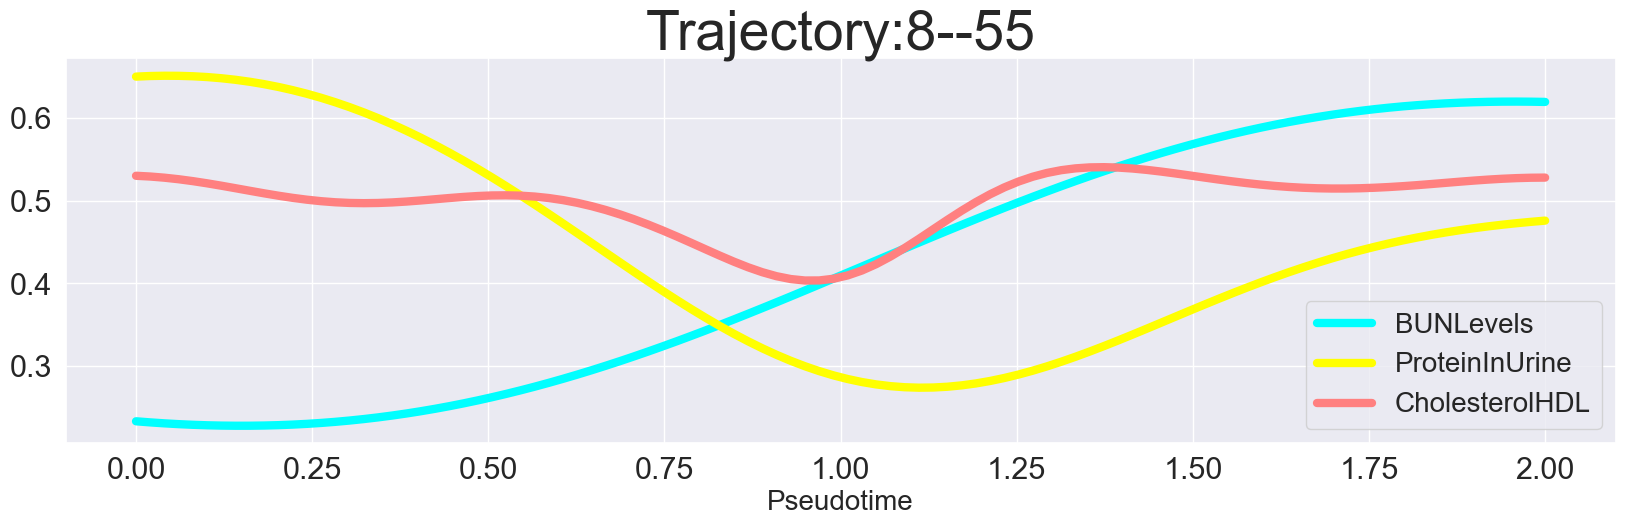

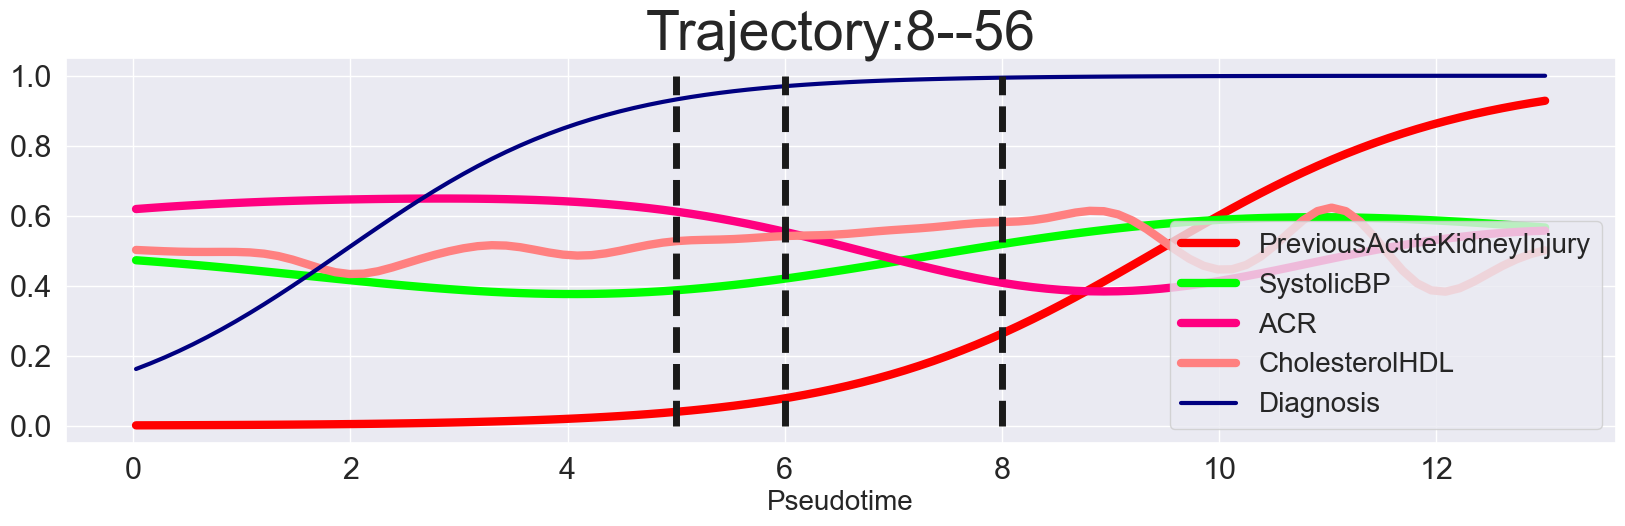

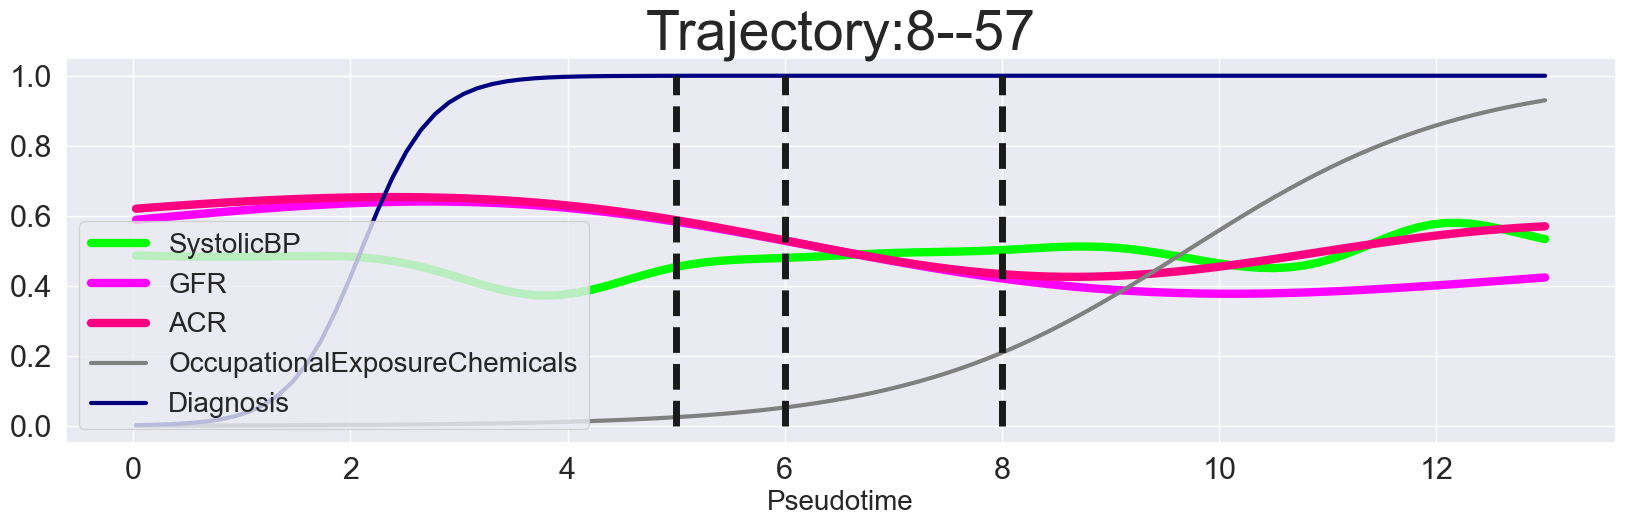

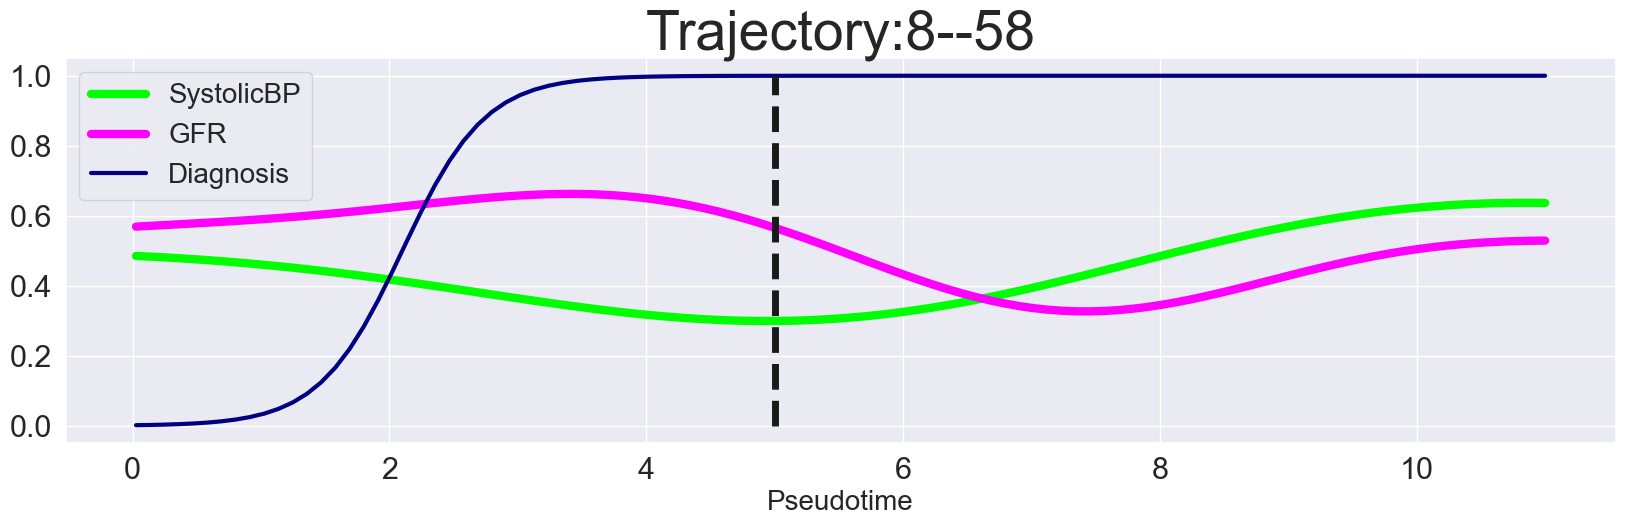

In [60]:
# Draw pseudotime dependencies of variables significantly associated with trajectories

reload(clintraj_util)
from clintraj_util import get_standard_color_seq


color_seq = get_standard_color_seq()
var_colors = {}
all_vars = list(all_trajectory_variable_associations.keys())
complication_variables = complication_variables = [
    'FamilyHistoryKidneyDisease', 
    'PreviousAcuteKidneyInjury', 
    'SystolicBP', 
    'DiastolicBP', 
    'SerumCreatinine', 
    'BUNLevels', 
    'GFR', 
    'ProteinInUrine', 
    'ACR', 
    'SerumElectrolytesSodium', 
    'SerumElectrolytesPotassium', 
    'SerumElectrolytesCalcium', 
    'SerumElectrolytesPhosphorus', 
    'HemoglobinLevels', 
    'Edema', 
    'Diuretics', 
    'ACEInhibitors', 
    'Statins', 
    'AntidiabeticMedications', 
    'CholesterolTotal', 
    'CholesterolLDL', 
    'CholesterolHDL', 
    'CholesterolTriglycerides', 
    'HeavyMetalsExposure', 
    'Smoking', 
    'AlcoholConsumption'
    'OccupationalExposureChemicals'
]
k=0
for var in complication_variables:
    if var in all_trajectory_variable_associations:
        #print(k)
        var_colors[var] = color_seq[k]
        k = k+1
        if k>len(color_seq)-1:
            k=0
for var in all_vars:
    if not var in complication_variables:
        #print(k)
        var_colors[var] = color_seq[k]
        k = k+1
        if k>len(color_seq)-1:
            k=0

sns.set(font_scale=2)

min_val = 1
max_val = 0

for pstt in PseudoTimeTraj:
    TrajName = 'Trajectory:'+str(pstt['Trajectory'][0])+'--'+str(pstt['Trajectory'][-1])
    fig = plt.figure(figsize=(20, 5))
    for var in all_trajectory_variable_associations:
        associations = all_trajectory_variable_associations[var]
        for assoc in associations:
            trajn = assoc[0]
            if trajn==TrajName:
                var = assoc[1]
                if var in complication_variables:
                    vals = draw_pseudotime_dependence(pstt,var,variable_names,variable_types,X_original,var_colors[var],
                                               linewidth=6,draw_datapoints=False)
                else:
                    vals = draw_pseudotime_dependence(pstt,var,variable_names,variable_types,X_original,var_colors[var],
                                               linewidth=3,draw_datapoints=False)
                if vals is not None:
                    min_val = min(min_val,min(vals))
                    max_val = max(max_val,max(vals))
                #else:
                #    print(var,TrajName,' regressor is not found')
    bp = pstt['BranchingPoints']
    for x in bp:
        plt.plot([x,x],[min_val,max_val],'k--',linewidth=5)
    if TrajName.endswith('52'):
        plt.legend(fontsize=18,loc='upper left')
    else:
        plt.legend(fontsize=20)
    plt.title(TrajName,fontsize=40)
    plt.savefig(TrajName+'.png', format='png', dpi=300)
    plt.show()

['HeavyMetalsExposure', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'BUNLevels', 'ProteinInUrine', 'ACR', 'PreviousAcuteKidneyInjury', 'CholesterolHDL', 'SystolicBP', 'Diagnosis', 'GFR', 'OccupationalExposureChemicals', 'HemoglobinLevels', 'Edema', 'CholesterolTotal', 'SerumCreatinine', 'FastingBloodSugar', 'CholesterolTriglycerides']



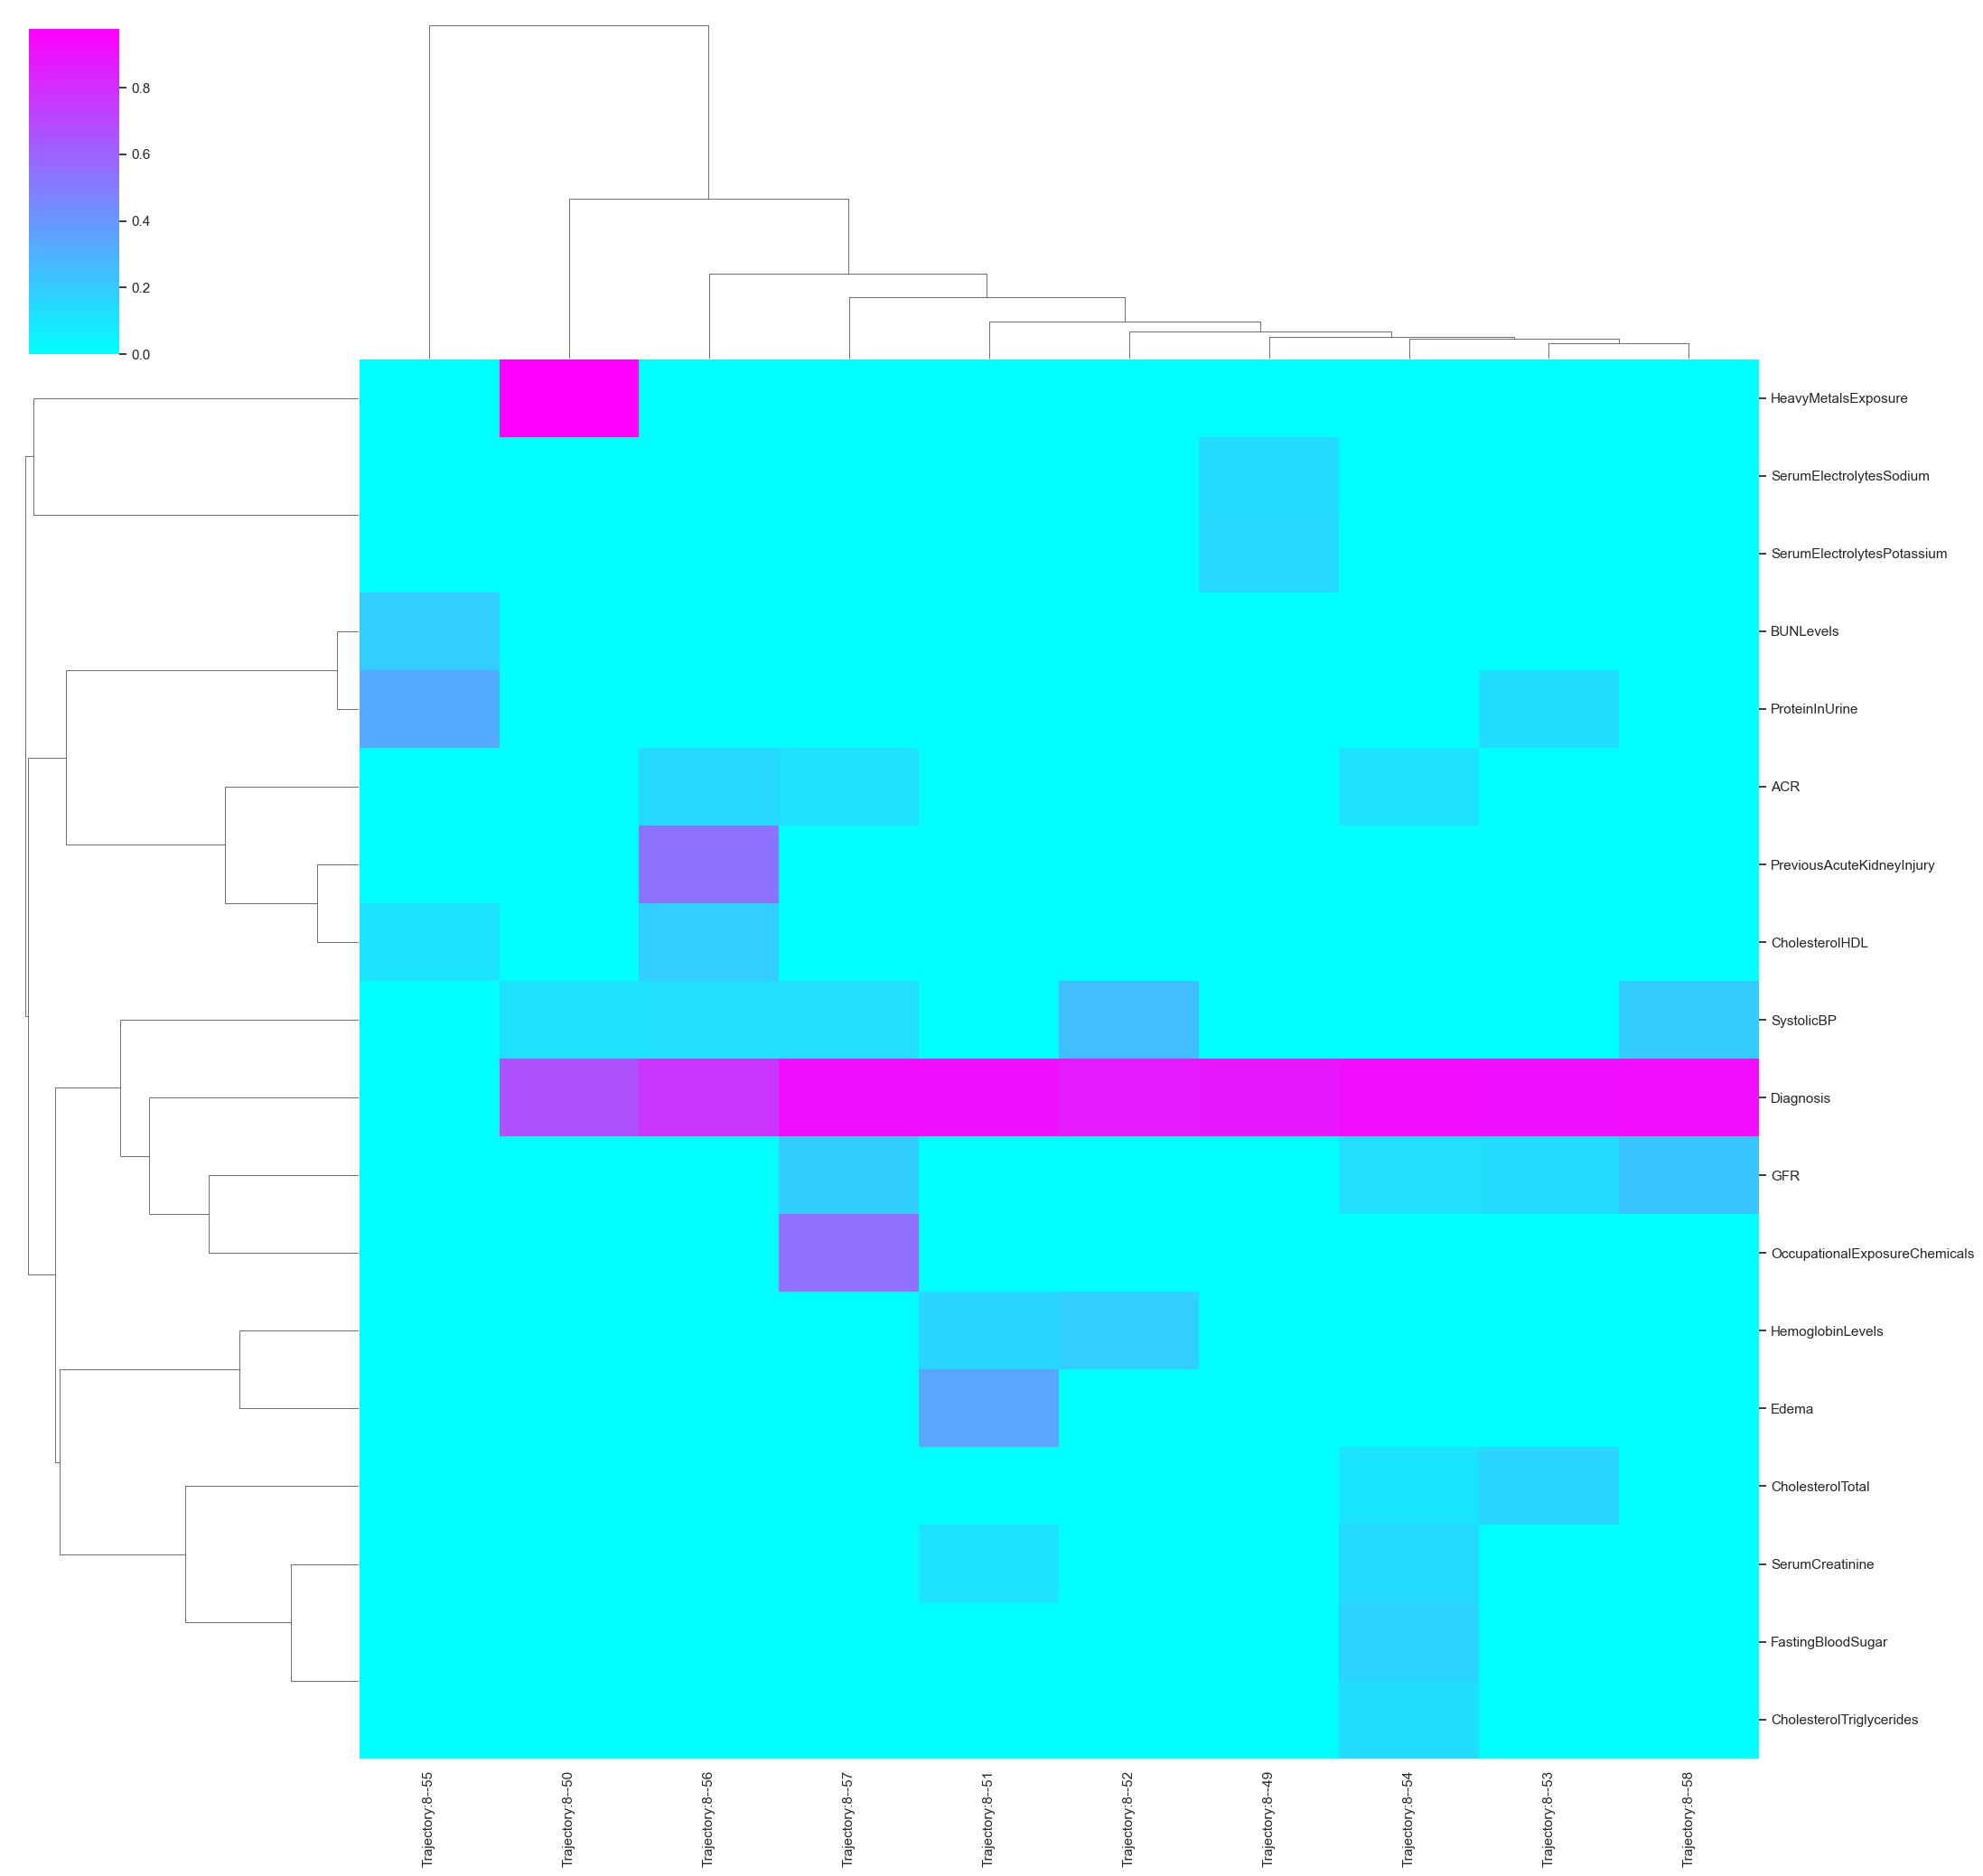

In [62]:
# Visualize associations between variables and trajectories

matrix_of_scores,keys,objects = get_matrix_of_association_scores(all_trajectory_variable_associations)

sns.set(color_codes=True)
#g = sns.clustermap(matrix_of_scores,metric="correlation",figsize=(7, 20))
g = sns.clustermap(matrix_of_scores,metric="correlation",figsize=(20, 20),cmap='cool')
objects_reordered = [objects[ind] for ind in g.dendrogram_col.reordered_ind]
keys_reordered = [keys[ind] for ind in g.dendrogram_row.reordered_ind]
g.ax_heatmap.set_xticklabels(objects_reordered)
g.ax_heatmap.set_yticklabels(keys_reordered)
print(keys_reordered)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
plt.savefig('associations_trajectories.png', format='png', dpi=300)
print()


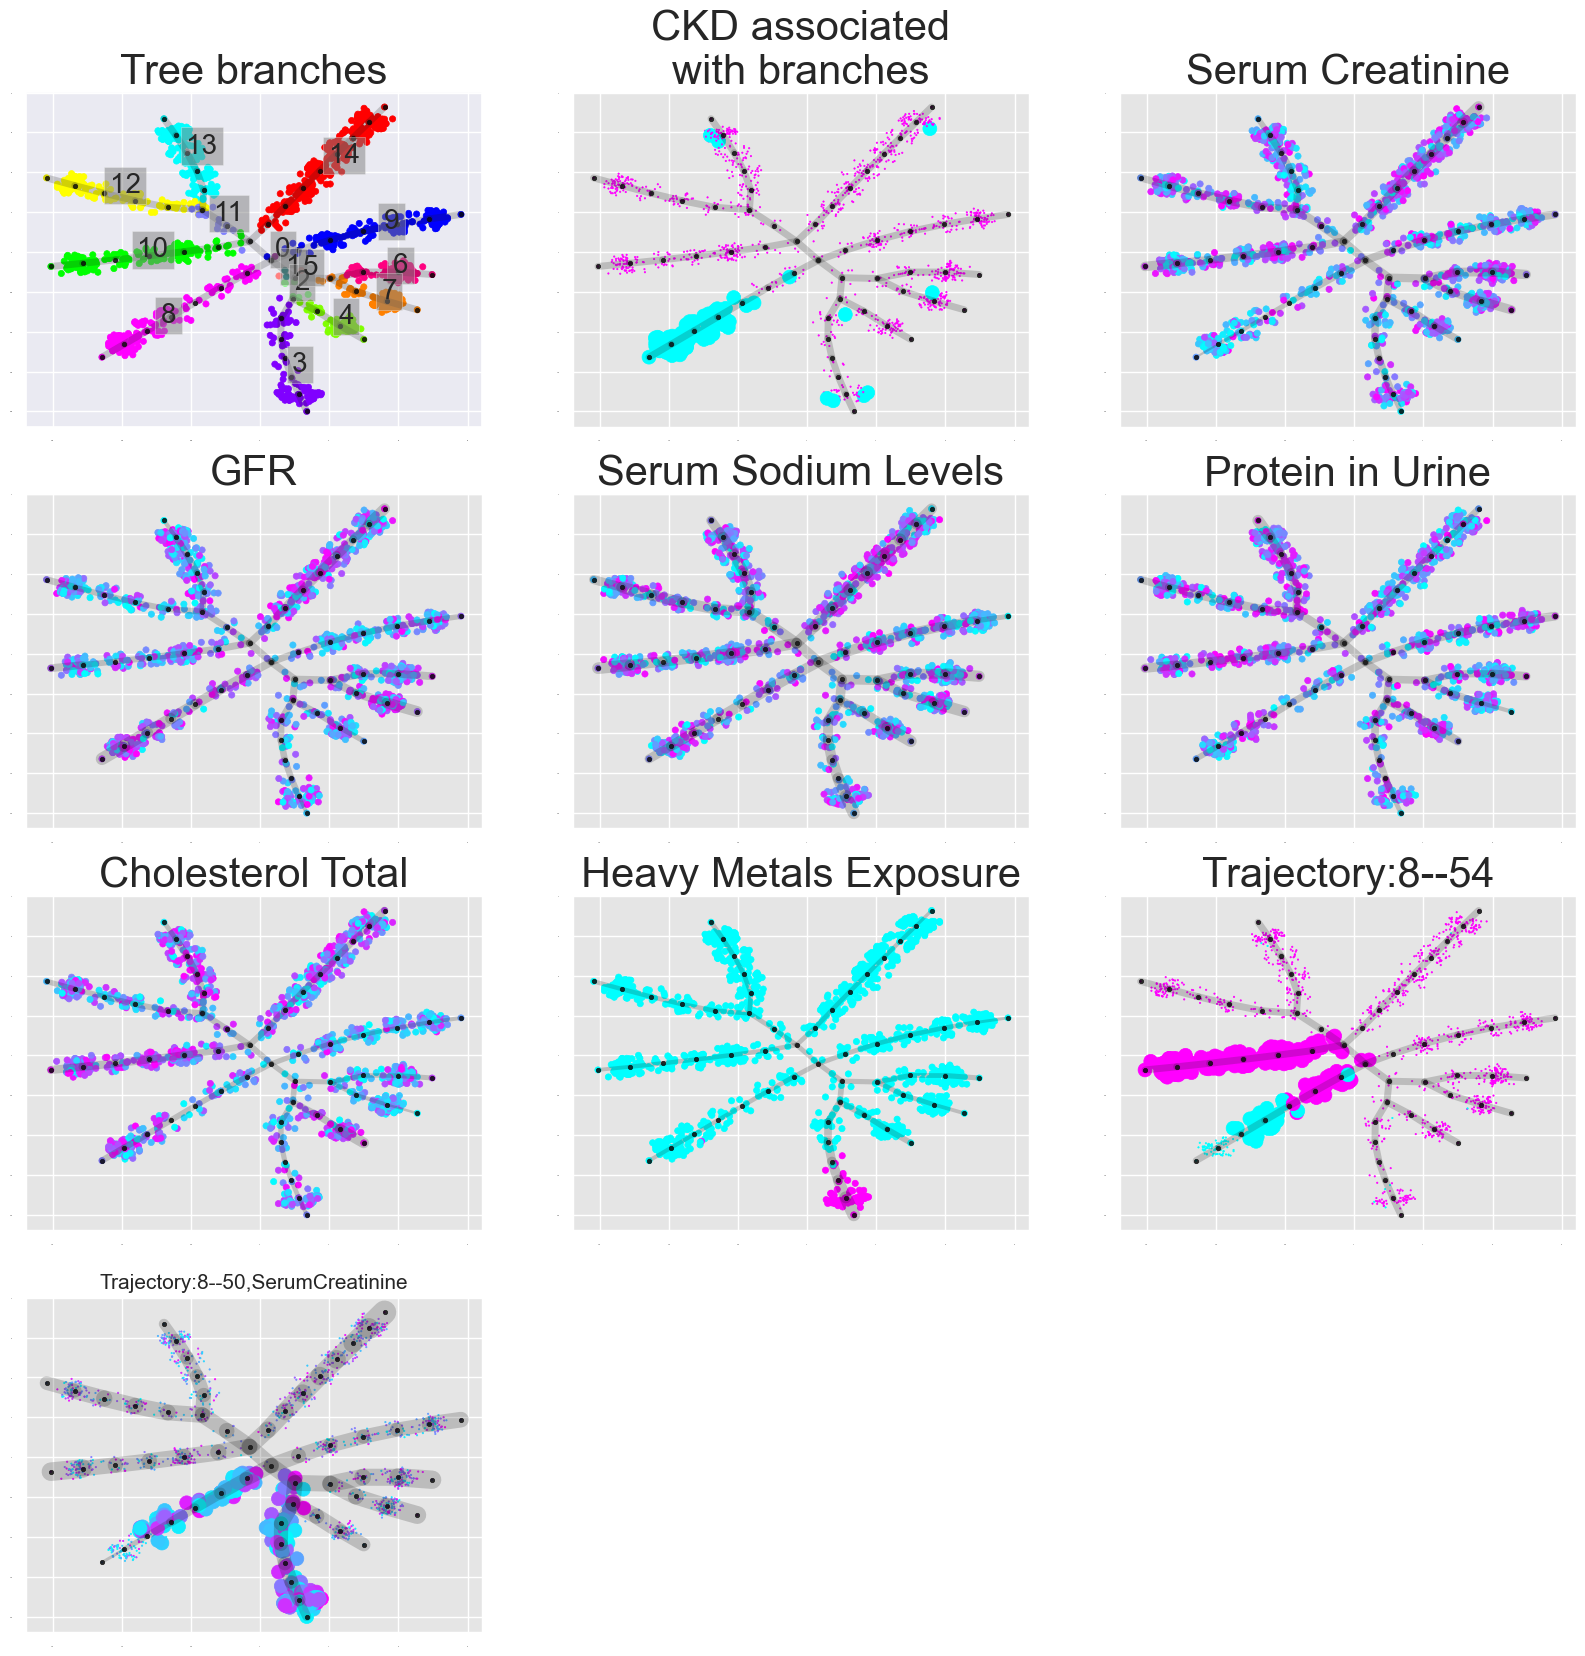

In [68]:
# Importing necessary libraries
reload(clintraj_eltree)
from clintraj_eltree import visualize_eltree_with_data, pseudo_time_trajectory, extract_trajectories, quantify_pseudotime

# Set the number of subplots and figure size
n_subplots_x, n_subplots_y = 4, 3
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 20))
title_font_size = 30

sns.set(font_scale=0, palette='bright')

# Visualize partitioning of data by branches
i = 1
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           showBranchNumbers=True, Color_by_partitioning=True, visualize_partition=vec_labels_by_branches)
plt.title('Tree branches', fontsize=title_font_size)

# Show only points of classes strongly associated with branches (CKD/Non-CKD)
i += 1
list_of_node_class_associations, p, stat = associate_with_categorical_var(
    vec_labels_by_branches, 'Diagnosis', color, 'CATEGORICAL', score_threshold=0.7, Negative_Enrichment=False, Minimal_number_of_points=5, verbose=False)
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title('CKD associated\nwith branches', fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           Visualize_Branch_Class_Associations=list_of_node_class_associations)

# Visualize CKD-specific variables

# Serum Creatinine visualization
i += 1
feature = 'SerumCreatinine'
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title('Serum Creatinine', fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           Min_Edge_Width=1, Max_Edge_Width=10, Color_by_feature=feature, Feature_Edge_Width=feature)

# GFR visualization
i += 1
feature = 'GFR'
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title('GFR', fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           Min_Edge_Width=1, Max_Edge_Width=10, Color_by_feature=feature, Feature_Edge_Width=feature)

# Serum Sodium visualization
i += 1
feature = 'SerumElectrolytesSodium'
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title('Serum Sodium Levels', fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           Min_Edge_Width=1, Max_Edge_Width=10, Color_by_feature=feature, Feature_Edge_Width=feature)

# Protein in Urine visualization
i += 1
feature = 'ProteinInUrine'
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title('Protein in Urine', fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           Min_Edge_Width=1, Max_Edge_Width=10, Color_by_feature=feature, Feature_Edge_Width=feature)

# Cholesterol Total visualization
i += 1
feature = 'CholesterolTotal'
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title('Cholesterol Total', fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           Min_Edge_Width=1, Max_Edge_Width=10, Color_by_feature=feature, Feature_Edge_Width=feature)

# Visualize Heavy Metals Exposure
i += 1
feature = 'HeavyMetalsExposure'
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title('Heavy Metals Exposure', fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           Min_Edge_Width=1, Max_Edge_Width=10, Color_by_feature=feature, Feature_Edge_Width=feature)

# Visualize a particular trajectory (highlighting CKD patients trajectory)
pstt = PseudoTimeTraj[5]
points = list(pstt['Points'])
TrajName = 'Trajectory:' + str(pstt['Trajectory'][0]) + '--' + str(pstt['Trajectory'][-1])
i += 1
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
plt.title(TrajName, fontsize=title_font_size)
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           highlight_subset=points, Big_Point_Size=100, Normal_Point_Size=1)

# Visualize a specific trajectory with an associated variable (like Creatinine levels)
pstt = PseudoTimeTraj[1]
points = list(pstt['Points'])
TrajName = 'Trajectory:' + str(pstt['Trajectory'][0]) + '--' + str(pstt['Trajectory'][-1])
i += 1
ax = fig.add_subplot(n_subplots_x, n_subplots_y, i)
feature = 'SerumCreatinine'
visualize_eltree_with_data(tree_extended, X, X_original, color, variable_names,
                           principal_component_vectors=v, mean_vector=mean_val,
                           highlight_subset=points, Big_Point_Size=100, Normal_Point_Size=1,
                           Min_Edge_Width=1, Max_Edge_Width=20, Color_by_feature=feature, Feature_Edge_Width=feature)
plt.title(TrajName + ',' + feature, fontsize=15)

plt.savefig('principal_tree_visexamples_CKD.png', format='png', dpi=400)
plt.show()


min: -0.319
max: 0.028


array([[ 0.70190621,  0.23794972],
       [-0.33320981,  0.58254631],
       [ 0.84317034,  1.59808937],
       ...,
       [-0.84435226, -1.06596474],
       [-0.3650352 , -0.43760518],
       [-1.22062578, -0.07831734]])

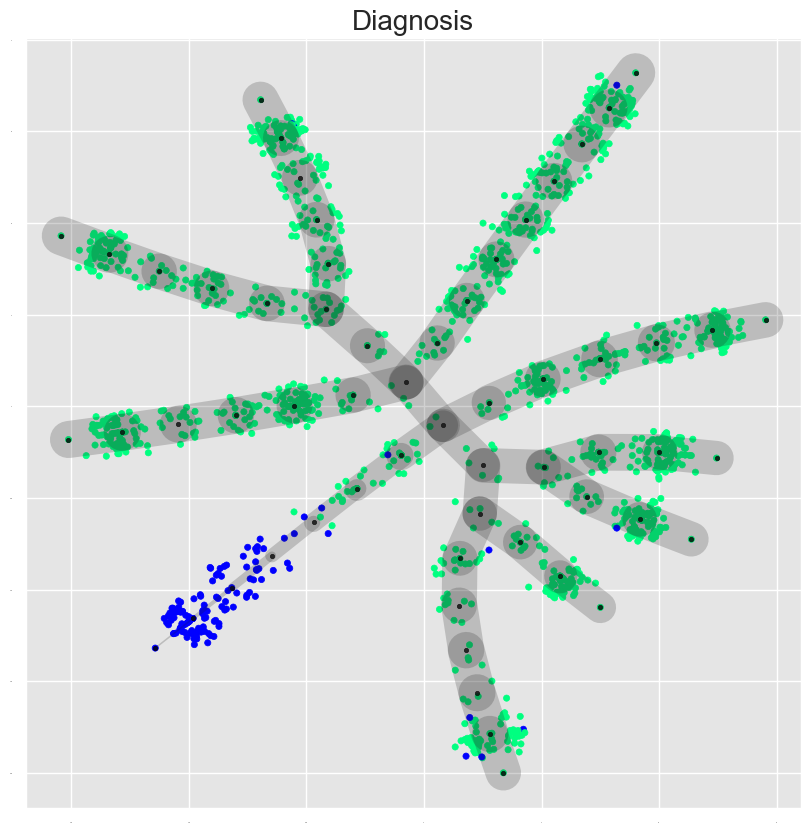

In [66]:
reload(clintraj_eltree)
from clintraj_eltree import visualize_eltree_with_data,pseudo_time_trajectory,extract_trajectories,quantify_pseudotime

title_font_size=20

feature ='Diagnosis'

print('min:',min(X_original[:,variable_names.index(feature)]))
print('max:',max(X_original[:,variable_names.index(feature)]))

#ax = fig.add_subplot(n_subplots_x,n_subplots_y,i)
plt.figure(figsize=(10,10))
plt.title(feature,fontsize=title_font_size)
visualize_eltree_with_data(tree_extended,X,X_original,color,variable_names,
                           principal_component_vectors=v,mean_vector=mean_val,
                          Min_Edge_Width=1,Max_Edge_Width=30,showNodeNumbers=False,
                           Color_by_feature=feature, Feature_Edge_Width=feature,cmap='winter')

Start computations...
PCA: 0.017 sec
Computing LLE...


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:149: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_PCA[:, 0], Y_PCA[:, 1], c=color1, cmap=cmap,s=points_size)


LLE: 0.88 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:171: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_LLE[:, 0], Y_LLE[:, 1], c=color1, cmap=cmap,s=points_size)


Modified LLE: 0.95 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:192: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_MLLE[:, 0], Y_MLLE[:, 1], c=color1, cmap=cmap,s=points_size)


Isomap: 1.1 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:211: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_ISOMAP[:, 0], Y_ISOMAP[:, 1], c=color1, cmap=cmap,s=points_size)


MDS: 2.3 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:231: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_MDS[:, 0], Y_MDS[:, 1], c=color1, cmap=cmap,s=points_size)


SpectralEmbedding: 0.75 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:251: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_se[:, 0], Y_se[:, 1], c=color1, cmap=cmap,s=points_size)


t-SNE: 2.8 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:272: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_TSNE[:, 0], Y_TSNE[:, 1], c=color1, cmap=cmap,s=points_size)


UMAP: 2.7 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:294: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_UMAP[:, 0], Y_UMAP[:, 1], c=color1, cmap=cmap,s=points_size)


TRIMAP: 0.51 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:312: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_TRIMAP[:, 0], Y_TRIMAP[:, 1], c=color1, cmap=cmap,s=points_size)


MDE: 0.68 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:331: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_MDE[:, 0], Y_MDE[:, 1], c=color1, cmap=cmap,s=points_size)


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
Autoencoder: 5.1 sec


/Users/alinamvar/Desktop/CKD-A/code/clintraj_ml.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_AUTOENCODER[:, 0], Y_AUTOENCODER[:, 1], c=color1, cmap=cmap,s=points_size)


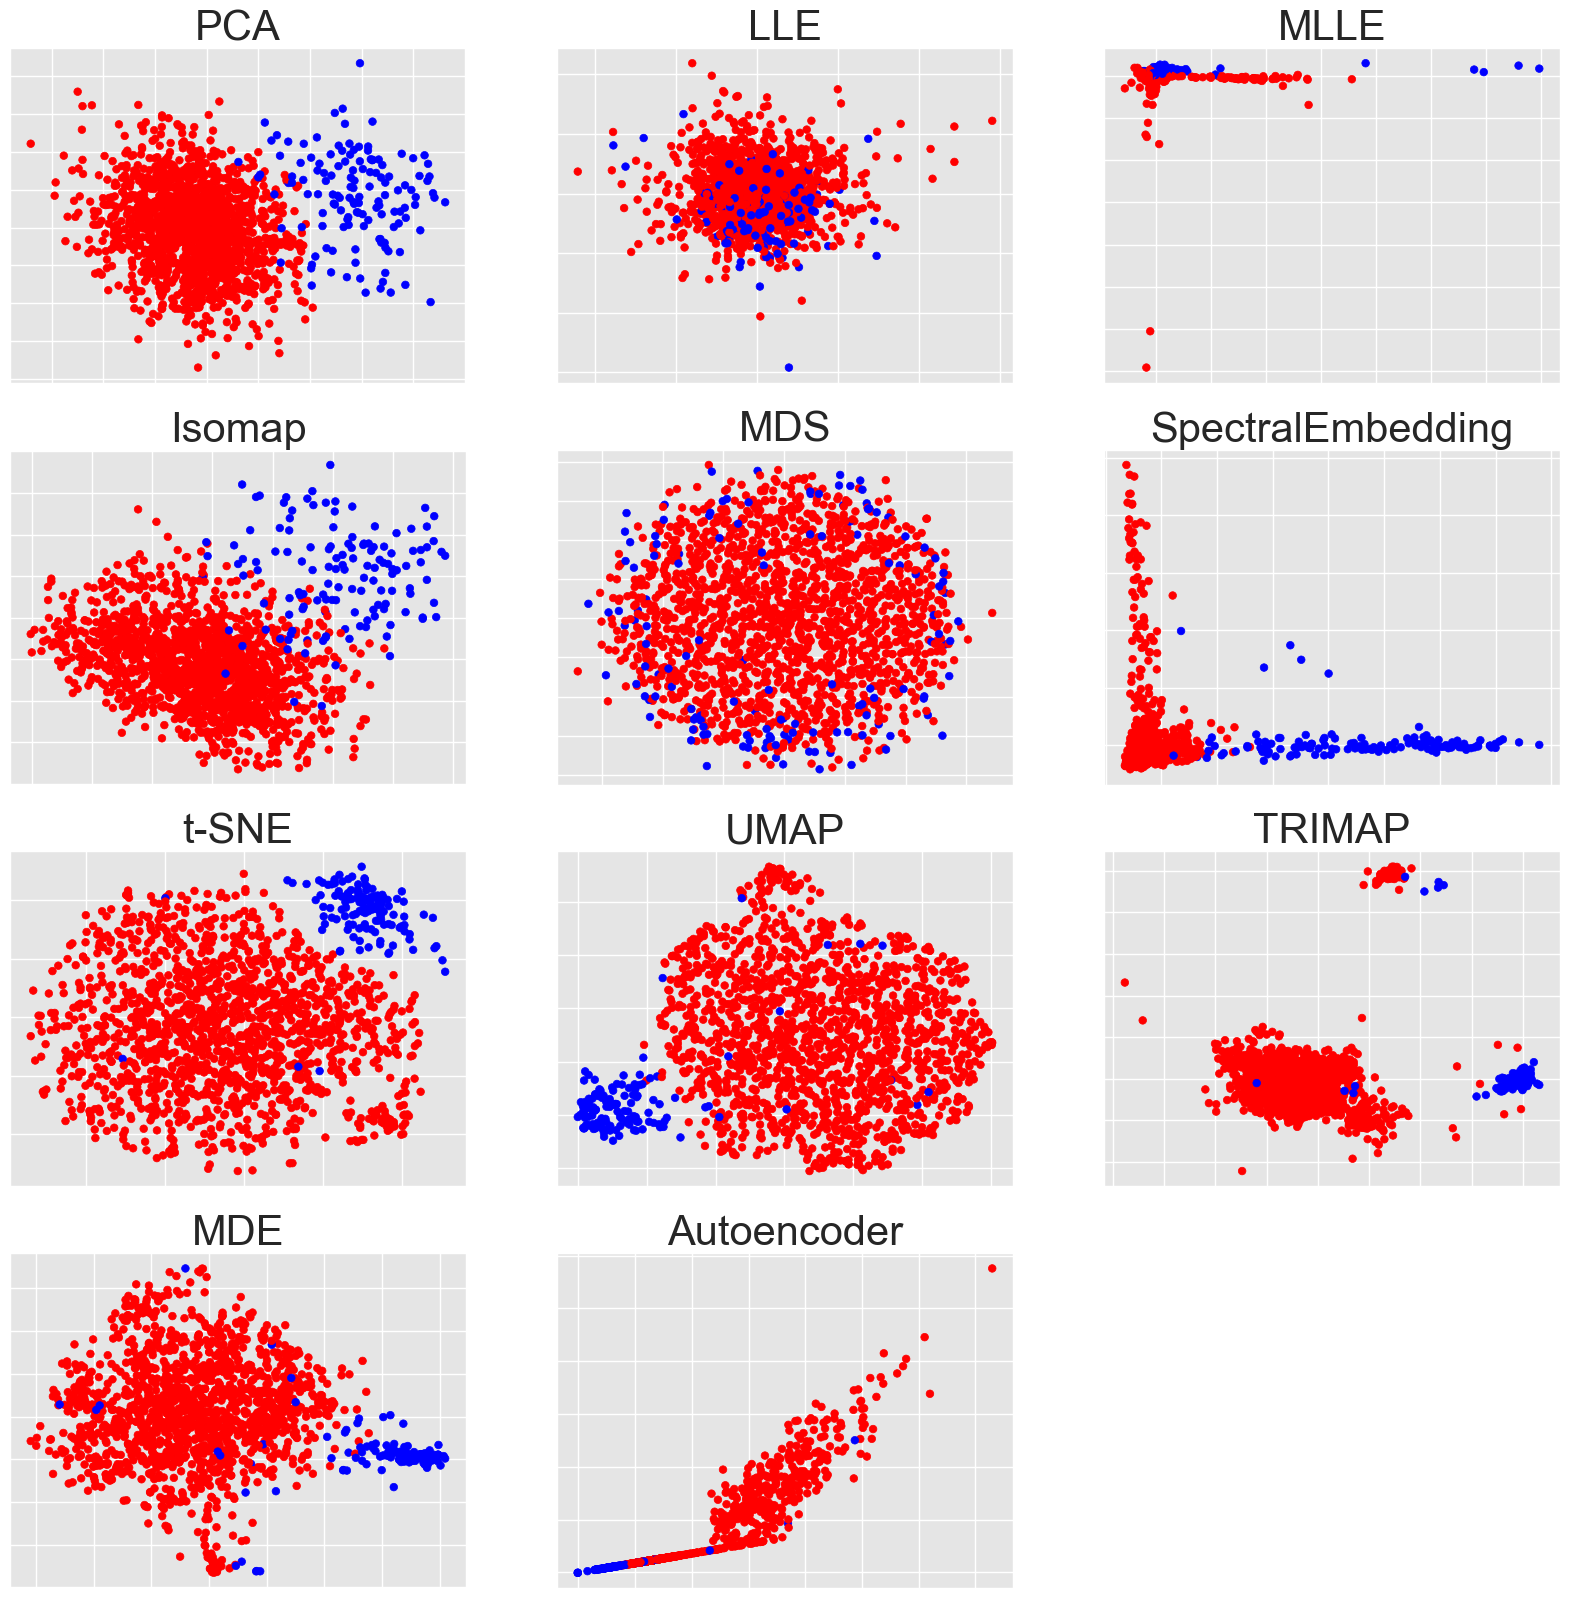

In [66]:
# Here the manifold learning is computed and saved in viz_results

reload(clintraj_ml)

sns.set(palette='bright')

viz_results = apply_panel_of_manifold_learning_methods(X,color,

    Color_by_branches=[],precomputed_results=viz_results,color_map='cool',ColorByFeature='', variable_names=[],

    ElMapFolder=ElMapFolder)

plt.savefig('manifolds_color_by_class.png', format='png', dpi=300)

plt.show() 

In [78]:
T = event_data[points, 0]
print("Unique values in T (Pseudotime):", np.unique(T))  # Check for any 0 or NaN values


Unique values in T (Pseudotime): [ 0.02688932  0.05345886  0.06114835  0.06183278  0.14006693  0.147234
  0.16552068  0.24800887  0.83813165  1.          1.0679627   1.97582753
  2.          2.00368504  2.15895494  2.16543841  2.66718209  2.81784681
  2.84651235  3.          3.22216442  3.26952547  3.37365448  3.70779005
  3.76154544  3.79186466  3.83114465  4.          4.01743869  4.0994522
  5.81584656  5.89423245  6.          6.03352751  6.20612552  6.49065049
  6.54946522  6.72931003  6.75801344  6.79761443  6.8287105   6.84374039
  6.91483167  6.98534042  7.          7.00043209  7.00755292  7.05107393
  7.06199362  7.06409504  7.10084188  7.2391796   7.41303183  7.6732901
  7.74057716  7.81336068  7.85449732  7.93656311  7.97781319  8.
  8.04337615  8.09022222  8.11747644  8.13225428  8.16020501  8.27236993
  8.34055604  8.40896768  8.44241842  8.4487559   8.69526714  8.71607692
  8.78024901  8.82412713  8.92802108  8.93546343  8.94335702  9.
  9.00541695  9.06352705  9.07037279  

In [106]:
E = event_data[points, 1]
print("Unique values in E (Event data):", np.unique(E))  # Check for any unexpected values in event data


Unique values in E (Event data): [0. 1.]


In [82]:
# Correct the Diagnosis column
df['Diagnosis'] = np.where(df['Diagnosis'] == 0.028, 1, 0)  # Map 0.028 to 1 (CKD positive), -0.319 to 0 (CKD negative)

# Verify the correction
print("Corrected Diagnosis column:", np.unique(df['Diagnosis']))

Corrected Diagnosis column: [0 1]


/opt/anaconda3/lib/python3.12/site-packages/lifelines/fitters/nelson_aalen_fitter.py:246: RuntimeWarning: invalid value encountered in divide
  self.ci_labels[0]: hazard_ * np.exp(z * std_hazard_ / hazard_),
/opt/anaconda3/lib/python3.12/site-packages/lifelines/fitters/nelson_aalen_fitter.py:247: RuntimeWarning: invalid value encountered in divide
  self.ci_labels[1]: hazard_ * np.exp(-z * std_hazard_ / hazard_),


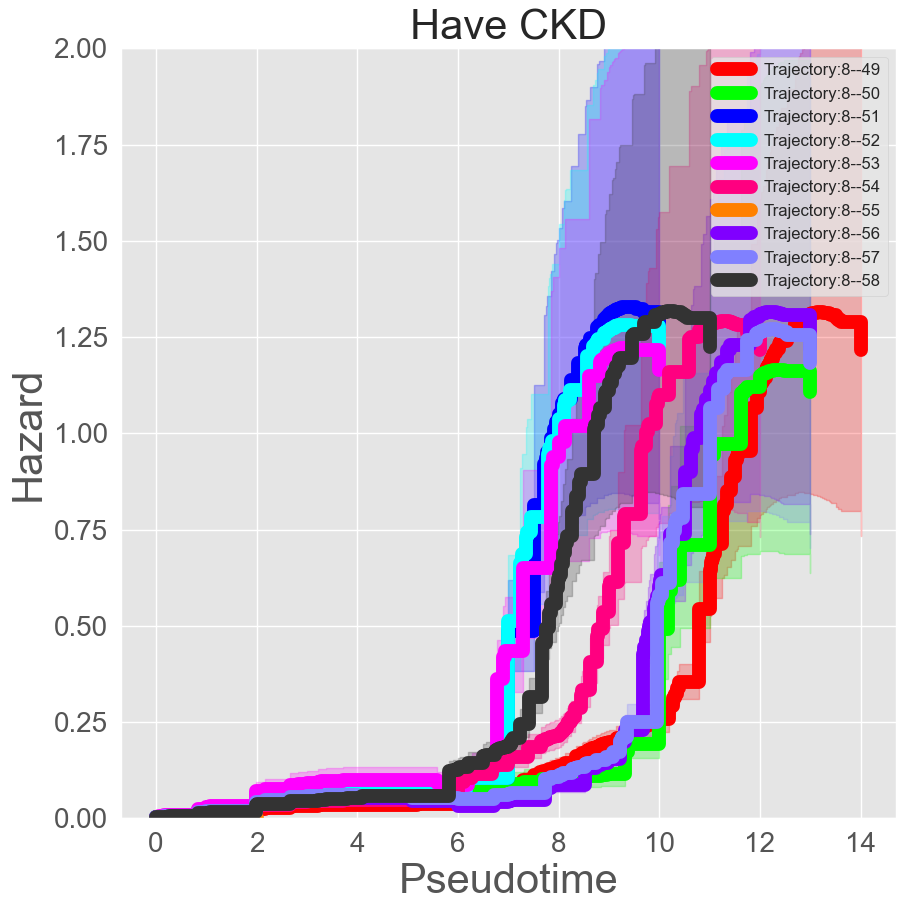

In [118]:
import lifelines
from lifelines import SplineFitter
from lifelines import NelsonAalenFitter
from lifelines import KaplanMeierFitter

color_seq = [[1,0,0],[0,1,0],[0,0,1],[0,1,1],[1,0,1],
             [1,0,0.5],[1,0.5,0],[0.5,0,1],
             [0.5,0.5,1],
             [0.2,0.2,0.2],[0,0.5,0.5],[0.5,0,0.5],
             [0.5,0.5,0],[0.5,0.5,0.5],[0,0,0.5],
             [0,0.5,0],[0.5,0,0],[0,0.25,0.5],
             [0,0.5,0.25],[0.25,0,0.5],[0.25,0.5,0],
             [0.5,0,0.25],[0.5,0.25,0],[0.25,0.25,0.5],
             [0.25,0.5,0.25],[0.5,0.25,0.25],[0.25,0.25,0.5],
             [0.25,0.5,0.25],[0.25,0.25,0.5],[0.25,0.5,0.25],
             [0.5,0,0.25],[0.5,0.25,0.25],
             [1,0,0.25],[1,0.25,0],[1,0.25,0.25],
             [0,1,0.25],[0.25,1,0],[0.25,1,0.25],
             [0,0.25,1],[0.25,0,1],[0.25,0.25,1],
             ]


event_data = np.zeros((len(df),2))
events = np.array(df['Diagnosis'])  # Use Diagnosis directly for event definition
label = 'Have CKD'

for i,pstt in enumerate(PseudoTimeTraj):
    points = pstt['Points']
    times = pstt['Pseudotime']
    for i,p in enumerate(points):
        event_data[p,0] = times[i]
        event_data[p,1] = events[p]  # CKD events are correctly defined now

plt.figure(figsize=(10,10))

for i,pstt in enumerate(PseudoTimeTraj):
    TrajName = 'Trajectory:'+str(pstt['Trajectory'][0])+'--'+str(pstt['Trajectory'][-1])
    points = pstt['Points']
    kmf = NelsonAalenFitter()  # Hazard function
    T = event_data[points,0]
    E = event_data[points,1]
    kmf.fit(event_data[points,0], event_observed=event_data[points,1],label=TrajName)  
    pstt['KMF'] = kmf
    kmf.plot_hazard(bandwidth=3.0, fontsize=20, linewidth=10, color=tuple(color_seq[i]))

plt.xlabel('Pseudotime', fontsize=30)
plt.ylim(0,2)
plt.ylabel('Hazard', fontsize=30)
plt.title(label, fontsize=30)
plt.legend(fontsize=12)
plt.show()

In [120]:
num_columns = len(df.columns)
print("Number of columns in df:", num_columns)


Number of columns in df: 52


In [122]:
df1 = df[df.columns[1:52]].copy()  # Create a copy of the slice
df1.loc[:, 'PSEUDOTIME'] = event_data[:, 0]  # Use .loc for assignment
df1.loc[:, 'CKD_status'] = event_data[:, 1]  # Use .loc for assignment
display(df1)

Gender  Ethnicity  SocioeconomicStatus  EducationLevel    BMI  Smoking  \
0      -0.34     -0.565               -0.865           0.348  0.473    0.651   
1      -0.34     -0.565                0.172           0.940  0.284    0.651   
2       0.32      0.480               -0.865          -0.568  1.341    0.651   
3      -0.34      1.014               -0.865          -0.568  0.509   -0.270   
4      -0.34      0.480                0.172           0.348 -0.534   -0.270   
...      ...        ...                  ...             ...    ...      ...   
1654   -0.34     -0.565                0.172           0.348  1.655    0.651   
1655   -0.34     -0.565                0.696          -0.568  0.179   -0.270   
1656   -0.34     -0.565                0.696           0.940 -0.778   -0.270   
1657   -0.34     -0.565                0.696           0.348 -0.364   -0.270   
1658    0.32      0.480               -0.865          -1.508 -1.148    0.651   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0                 -0.835            -1.168       -1.671        -1.682  ...   
1                  1.490             1.170        0.515         0.417  ...   
2                  0.330             1.599       -1.021        -1.497  ...   
3                  1.044            -1.611        0.676        -0.387  ...   
4                 -0.349            -1.481       -0.674        -1.714  ...   
...                  ...               ...          ...           ...  ...   
1654              -1.483            -0.302        1.248        -1.000  ...   
1655              -1.138             1.613        1.678        -0.317  ...   
1656               1.010             0.812        0.003         0.880  ...   
1657               0.517            -1.538       -0.164        -0.831  ...   
1658               0.246             0.845       -1.491         0.733  ...   

      QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
0                  0.947               -0.077                         -0.144   
1                 -0.345               -0.077                         -0.144   
2                  1.551               -0.077                          1.250   
3                  1.450               -0.077                         -0.144   
4                 -1.599               -0.077                         -0.144   
...                  ...                  ...                            ...   
1654               1.128               -0.077                         -0.144   
1655              -1.407               -0.077                          1.250   
1656               0.715               -0.077                         -0.144   
1657              -0.642               -0.077                         -0.144   
1658               1.171               -0.077                         -0.144   

      WaterQuality  MedicalCheckupsFrequency  MedicationAdherence  \
0            0.884                    -0.860                0.007   
1           -0.217                     1.685                1.130   
2            0.884                    -0.500                0.933   
3           -0.217                     1.074               -0.580   
4            0.884                    -1.503               -0.383   
...            ...                       ...                  ...   
1654        -0.217                    -0.919                1.603   
1655        -0.217                     1.405               -1.163   
1656        -0.217                    -1.050                0.286   
1657        -0.217                    -1.262               -0.768   
1658        -0.217                    -0.215               -1.660   

      HealthLiteracy  Diagnosis  PSEUDOTIME  CKD_status  
0              1.630          1    7.813361         1.0  
1              0.695          1    8.000000         1.0  
2              0.762          1   13.016042         1.0  
3              0.512          1   11.078438         1.0  
4             -1.278        

Trajectory: Trajectory:8--52
Number of points= 186
Number of lethal cases= 157
Num of variables 17


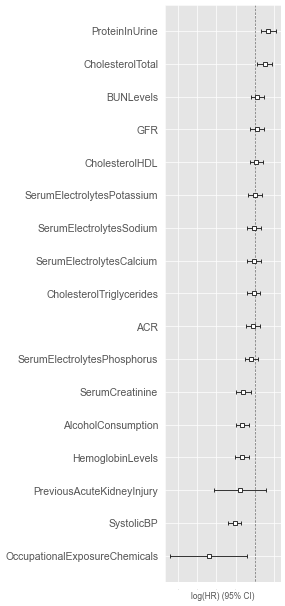

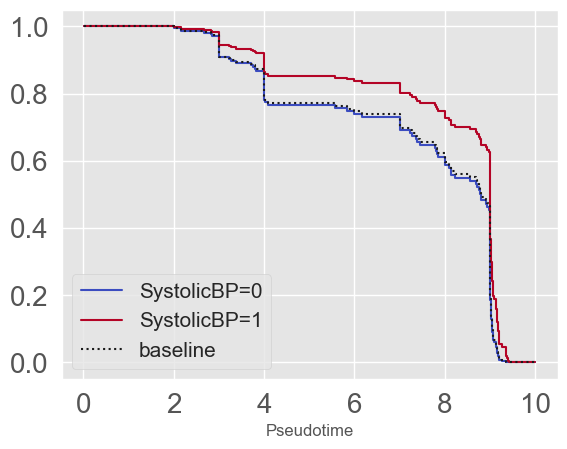

In [134]:
from lifelines import CoxPHFitter

# If we want to do global regression (which is dangerous because pseudo-times are not comparable)
df2 = df1

# Here we want to focus on a particular trajectory
traj_num = 3
if traj_num>=0:
    pstt = PseudoTimeTraj[traj_num]
    TrajName = 'Trajectory:'+str(pstt['Trajectory'][0])+'--'+str(pstt['Trajectory'][-1])
    print('Trajectory: '+TrajName)
    points = pstt['Points']
    print('Number of points=',len(points))
    print('Number of lethal cases=',np.sum(event_data[points,1]==1))
    df2 = df1.iloc[points]

nonredundant_cols = ['PreviousAcuteKidneyInjury', 'CholesterolHDL', 'CholesterolTriglycerides', 'SerumCreatinine', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'GFR', 'AlcoholConsumption', 'SystolicBP', 'ACR', 'ProteinInUrine',  'BUNLevels', 'SerumElectrolytesCalcium', 'OccupationalExposureChemicals', 'CholesterolTotal', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium'  
]
colnames = df2.columns.to_list()
#colnames.remove('DEATH_EVENT')
#colnames.remove('PSEUDOTIME')
colnames = list(set(colnames)&set(nonredundant_cols))
print('Num of variables',len(colnames))
formula = '+'.join(colnames)

cph = CoxPHFitter(penalizer=0.01)
cph.fit(df2, duration_col='PSEUDOTIME', event_col='CKD_status',formula=formula)


#cph.print_summary()
plt.figure(figsize=(3,15),dpi=50)
cph.plot()
plt.yticks(fontsize=15)
plt.show()

var = 'SystolicBP'

#cph.plot_partial_effects_on_outcome(covariates='n_r_ecg_p_02', values=[0, 1], cmap='coolwarm')
#cph.plot_partial_effects_on_outcome(covariates='nr_08', values=[0, 1], cmap='coolwarm')
#cph.plot_partial_effects_on_outcome(covariates='REC_IM', values=[0, 1], cmap='coolwarm')
#cph.plot_partial_effects_on_outcome(covariates='O_L_POST', values=[0, 1], cmap='coolwarm')
#cph.plot_partial_effects_on_outcome(covariates='zab_leg_03', values=[0, 1], cmap='coolwarm')
#cph.plot_partial_effects_on_outcome(covariates='SIM_GIPERT', values=[0, 1], cmap='coolwarm')
cph.plot_partial_effects_on_outcome(covariates=var, values=[0, 1], cmap='coolwarm')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Pseudotime')
plt.legend(fontsize=15)
plt.savefig('cov_effect.png', dpi = 600)
plt.show()

In [136]:
def save_point_projections_in_table(vec_labels_by_branches, PseudoTimeTraj):
    point2trajmap = {}
    point2trajnamemap = {}
    point2pst = {}
    alltrajnames = []
    alltrajnums = []
    traj_binary = {}
    for i in range(len(vec_labels_by_branches)):
        point2trajmap[i] = []
        point2trajnamemap[i] = []
    for i,pstt in enumerate(PseudoTimeTraj):
        pstt = PseudoTimeTraj[i]
        TrajName = 'Trajectory:'+str(pstt['Trajectory'][0])+'--'+str(pstt['Trajectory'][-1])
        alltrajnames.append(TrajName)
        alltrajnums.append(pstt['Trajectory'][-1])
        points = pstt['Points']
        pseudotime = pstt['Pseudotime']
        for k,p in enumerate(points):
            #point2trajmap[p].append(TrajName)
            point2trajmap[p].append(pstt['Trajectory'][-1])
            point2trajnamemap[p].append(TrajName)
            point2pst[p] = pseudotime[k]
        traj_binary[TrajName] = np.zeros(len(vec_labels_by_branches)).astype(np.int32)

    point2trajmap_list = []
    point2pst_list = []

    for i in range(len(vec_labels_by_branches)):
        point2trajmap_list.append(point2trajmap[i])
        point2pst_list.append(point2pst[i])
        for tn in point2trajnamemap[i]:
            traj_binary[tn][i] = 1

    data={'Point':np.arange(len(vec_labels_by_branches))+1,
                            'Segment':vec_labels_by_branches,
                           'Pseudotime':point2pst_list,
                           'Trajectories':point2trajmap_list}
    for tn in alltrajnames:
        data[tn] = traj_binary[tn]
    df = pd.DataFrame(data=data)
    return df

vec_labels_by_branches = partition_data_by_tree_branches(X,tree_extended).astype(np.int32)
table2save = save_point_projections_in_table(vec_labels_by_branches,PseudoTimeTraj)
table2save.to_csv('results.txt',sep='\t',index=False)